# Comparaison des prédictions des modèles

## Modèles à comparer

- GNN sur DataSet barycentrique sans critère d'erreur informé par la physique
- GNN sur DataSet barycentrique avec critère d'erreur informé par la physique
- GNN sur DataSet planétaire sans critère d'erreur informé par la physique
- LSTM sur DataSet planétaire sans critère d'erreur informé par la physique
- LSTM sur DataSet planétaire avec critère d'erreur informé par la physique

## 1. Chargement des librairies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. Définition des chemins des fichiers (à ajuster selon votre environnement local)

In [2]:
# Chemins des fichiers des valeurs attendues.
body_coordinates_and_velocities_targets_path = "G:/Mon disque/GIF-7005-Project/data/body_coordinates_and_velocities_from_1749-12-31_to_2200-01-09.json"
planetary_centroid_coordinates_and_velocities_targets_path = "G:/Mon disque/GIF-7005-Project/data/planetary_centroid_coordinates_and_velocities_from_1749-12-31_to_2200-01-09.json"

# Chemins des fichiers des prédictions des différents modèles.
predictions_body_coordinates_vanilla_2025_path = "results/gnn_planet_coord_vanilla/predicted_planet_coordinates_and_velocities_from_2025-01-01_to_2025-12-31.json"
predictions_body_coordinates_pi_2025_path = "results/gnn_planet_coord_pi/predicted_planet_coordinates_and_velocities_from_2025-01-01_to_2025-12-31.json"
predictions_planetery_centroid_coordinates_vanilla_2025_path = "results/gnn_planetery_centroid_coord_vanilla/predicted_planetery_centroid_coordinates_and_velocities_from_2025-01-01_to_2025-12-31.json"
predictions_planetery_centroid_coordinates_pi_2025_path = "results/gnn_planetery_centroid_coord_pi/predicted_planetery_centroid_coordinates_and_velocities_from_2025-01-01_to_2025-12-31.json"

## 2. Chargement des prédictions et des valeurs attendues

In [ ]:
body_names_ordered_by_body_mass: list[str] = ["Mercure","Mars","Venus","Terre","Uranus","Neptune","Saturne","Jupiter","Soleil"]

def set_planet_names(df: pd.DataFrame) -> None:
    body_masses: list[float] = list(set(df['body_mass']))
    body_masses.sort()
    df["planet_name"] = [body_names_ordered_by_body_mass[body_masses.index(mass)] for mass in df['body_mass']]

# Chargement des valeurs attendues.
df_body_coordinates: pd.DataFrame = pd.read_json(body_coordinates_and_velocities_targets_path, lines=True)
df_body_coordinates = df_body_coordinates[(df_body_coordinates["datetime_str"].str.startswith("A.D. 2025-"))]
df_body_coordinates['body_mass'] = np.log10(df_body_coordinates['body_mass'])

df_planetery_centroid_coordinates: pd.DataFrame = pd.read_json(planetary_centroid_coordinates_and_velocities_targets_path, lines=True)
df_planetery_centroid_coordinates = df_planetery_centroid_coordinates[(df_planetery_centroid_coordinates["datetime_str"].str.startswith("A.D. 2025-"))]
df_planetery_centroid_coordinates['body_mass'] = np.log10(df_planetery_centroid_coordinates['body_mass'])

# Chargement des prédictions.
df_predictions_body_coordinates_vanilla_2025: pd.DataFrame = pd.read_json(predictions_body_coordinates_vanilla_2025_path, lines=True)
df_predictions_body_coordinates_pi_2025: pd.DataFrame = pd.read_json(predictions_body_coordinates_pi_2025_path, lines=True)
df_predictions_planetery_centroid_coordinates_vanilla_2025: pd.DataFrame = pd.read_json(predictions_planetery_centroid_coordinates_vanilla_2025_path, lines=True)
df_predictions_planetery_centroid_coordinates_pi_2025: pd.DataFrame = pd.read_json(predictions_planetery_centroid_coordinates_pi_2025_path, lines=True)

# Affectation du nom de la planète sur chaque ligne de prédiction pour faciliter les traitements ultérieurs.
set_planet_names(df_predictions_body_coordinates_vanilla_2025)
set_planet_names(df_predictions_body_coordinates_pi_2025)
set_planet_names(df_predictions_planetery_centroid_coordinates_vanilla_2025)
set_planet_names(df_predictions_planetery_centroid_coordinates_pi_2025)

In [6]:
display(df_body_coordinates.sample(5))
display(df_predictions_body_coordinates_vanilla_2025.sample(5))
display(df_predictions_body_coordinates_pi_2025.sample(5))

display(df_planetery_centroid_coordinates.sample(5))
display(df_predictions_planetery_centroid_coordinates_vanilla_2025.sample(5))
display(df_predictions_planetery_centroid_coordinates_pi_2025.sample(5))

body_id body_name  body_mass  datetime_jd  \
265107      199   Mercure  23.518659    2460971.5   
593836      399     Terre  24.776147    2460962.5   
757928      499      Mars  23.807339    2460685.5   
429347      299     Venus  24.687306    2460842.5   
265150      199   Mercure  23.518659    2461014.5   

                          datetime_str         x         y         z  \
265107  A.D. 2025-Oct-23 00:00:00.0000  0.168639 -0.413109 -0.048963   
593836  A.D. 2025-Oct-14 00:00:00.0000  0.930455  0.344587  0.000114   
757928  A.D. 2025-Jan-10 00:00:00.0000 -0.640168  1.485937  0.046981   
429347  A.D. 2025-Jun-16 00:00:00.0000  0.533009 -0.495169 -0.037586   
265150  A.D. 2025-Dec-05 00:00:00.0000 -0.283337  0.189451  0.041758   

              vx        vy            vz  
265107  0.020289  0.012363 -8.499791e-04  
593836 -0.006304  0.016047 -7.033000e-07  
757928 -0.012340 -0.004293  2.127975e-04  
429347  0.013500  0.014872 -5.743361e-04  
265150 -0.021818 -0.021923  2.100660e-04

day          x          y         z        vx        vy            vz  \
2104  233  10.314114  16.538765 -0.072290 -0.003361  0.001908  5.148440e-05   
3091  343   0.041814  -1.412614 -0.028875  0.014353  0.001657 -3.351704e-04   
2534  281  -1.124572   5.027324  0.004347 -0.007558 -0.001225  1.830104e-04   
113    12   0.951776   4.988805 -0.041987 -0.007501  0.001777  1.609225e-04   
2232  248  -0.004518  -0.012975  0.000172  0.000007 -0.000005 -4.377000e-07   

      body_mass planet_name  
2104  25.938570      Uranus  
3091  23.807339        Mars  
2534  27.278341     Jupiter  
113   27.278341     Jupiter  
2232  30.298634      Soleil

day          x          y         z        vx        vy            vz  \
1432  159   0.475464   0.092241 -0.011000 -0.018664  0.017352  3.723142e-03   
39      4  -0.269883   0.942629  0.000135 -0.016896 -0.004523  2.457000e-07   
1618  179  10.496639  16.465031 -0.078103 -0.002812  0.001969 -5.011000e-06   
3255  361   9.540282   0.197412 -0.382250 -0.000293  0.005601 -7.397100e-05   
1876  208  -1.755715  -0.514007  0.029163  0.003102 -0.012473 -3.868944e-04   

      body_mass planet_name  
1432  23.518658     Mercure  
39    24.776146       Terre  
1618  25.938570      Uranus  
3255  26.754608     Saturne  
1876  23.807339        Mars

body_id body_name  body_mass  datetime_jd  \
758001         4      Mars  23.807339    2460758.5   
1415707        8   Neptune  26.010427    2460988.5   
1086915        6   Saturne  26.754700    2460934.5   
429293         2     Venus  24.687306    2460788.5   
757965         4      Mars  23.807339    2460722.5   

                           datetime_str          x         y         z  \
758001   A.D. 2025-Mar-24 00:00:00.0000  -1.378533  0.931433  0.053476   
1415707  A.D. 2025-Nov-09 00:00:00.0000  29.872542  0.346063 -0.695570   
1086915  A.D. 2025-Sep-16 00:00:00.0000   9.534412 -0.343346 -0.373647   
429293   A.D. 2025-Apr-23 00:00:00.0000  -0.449912 -0.576315  0.017997   
757965   A.D. 2025-Feb-16 00:00:00.0000  -1.060343  1.260475  0.052565   

               vx        vy        vz  
758001  -0.007351 -0.010369 -0.000037  
1415707 -0.000057  0.003158 -0.000064  
1086915 -0.000108  0.005563 -0.000092  
429293   0.015820 -0.012529 -0.001085  
757965  -0.010214 -0.007771  0.000088

day          x          y         z        vx        vy        vz  \
1500  166  10.637129  16.347050 -0.077114 -0.002271  0.002393  0.000018   
819    91  -0.349794  -0.268101  0.011525  0.010760 -0.021726 -0.002754   
2817  313   0.402329  -0.017923 -0.030926 -0.008230  0.029549  0.003192   
2145  238  -1.275328  -0.951103  0.013272  0.008724 -0.010033 -0.000411   
3016  335  -0.469329  -0.566041  0.016850  0.015853 -0.013035 -0.001104   

      body_mass planet_name  
1500  25.938681      Uranus  
819   23.518660     Mercure  
2817  23.518660     Mercure  
2145  23.807339        Mars  
3016  24.687305       Venus

day          x         y         z        vx        vy        vz  \
2826  314   0.314548 -0.609486 -0.032046  0.020606  0.002027 -0.001304   
1114  123  29.872742 -0.222392 -0.682454 -0.000001  0.003248 -0.000062   
1265  140   9.523510 -0.996914 -0.360806  0.000288  0.005472 -0.000105   
851    94   9.508038 -1.248849 -0.356163  0.000429  0.005477 -0.000111   
2965  329  -1.414971  4.985260  0.013999 -0.007541 -0.001540  0.000183   

      body_mass planet_name  
2826  23.518660     Mercure  
1114  26.010427     Neptune  
1265  26.754700     Saturne  
851   26.754700     Saturne  
2965  27.278433     Jupiter

## 3. Traçage des trajectoires prédites des planètes ou des barycentres des systèmes planétaires en comparaison avec les valeurs attendues

In [69]:
planet_names: list[str] = ["Mercure","Venus","Terre","Mars","Jupiter","Saturne","Uranus","Neptune"]

def plot_planet_coordinates(num_days: int, show_sun: bool = True) -> None:
    # Génération et affichage d'un graphique par planète, montrant l'évolution de la trajectoire par rapport à la trajectoire attendue.
    # Les positions prédites par chaque modèle sont dans une couleur différente.
    for planet_name in planet_names:
        # Traçage des trajectoires attendues
        df_planet_target: pd.DataFrame = df_body_coordinates[(df_body_coordinates["datetime_jd"] >= 2460676.5) & (df_body_coordinates["datetime_jd"] < 2460677.5 + num_days) & (df_body_coordinates["body_name"] == planet_name)]

        df_planet_coordinates_prediction_vanilla: pd.DataFrame = df_predictions_body_coordinates_vanilla_2025[
            (df_predictions_body_coordinates_vanilla_2025["day"] < num_days) & (df_predictions_body_coordinates_vanilla_2025["planet_name"] == planet_name)]
        
        df_planet_coordinates_prediction_pi: pd.DataFrame = df_predictions_body_coordinates_pi_2025[
            (df_predictions_body_coordinates_pi_2025["day"] < num_days) & (df_predictions_body_coordinates_pi_2025["planet_name"] == planet_name)]
        
        df_centroid_coordinates_prediction_vanilla: pd.DataFrame = df_predictions_planetery_centroid_coordinates_vanilla_2025[
            (df_predictions_planetery_centroid_coordinates_vanilla_2025["day"] < num_days) & (df_predictions_planetery_centroid_coordinates_vanilla_2025["planet_name"] == planet_name)]
        
        df_centroid_coordinates_prediction_pi: pd.DataFrame = df_predictions_planetery_centroid_coordinates_pi_2025[
            (df_predictions_planetery_centroid_coordinates_pi_2025["day"] < num_days) & (df_predictions_planetery_centroid_coordinates_pi_2025["planet_name"] == planet_name)]

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))

        axes[0].plot(df_planet_target["x"], df_planet_target["y"], marker=".", ls="None", color="gray", label="Positions réelles")
        axes[0].plot(df_planet_coordinates_prediction_vanilla["x"], df_planet_coordinates_prediction_vanilla["y"], ls="None", marker=".", color="#00BFFF", label="Prédictions GNN Planètes")
        axes[0].plot(df_planet_coordinates_prediction_pi["x"], df_planet_coordinates_prediction_pi["y"], marker=".", ls="None", color="#BA55D3", label="Prédictions GNN Planètes PI")

        axes[1].plot(df_planet_target["x"], df_planet_target["y"], marker=".", ls="None", color="gray", label="Positions réelles")
        axes[1].plot(df_centroid_coordinates_prediction_vanilla["x"], df_centroid_coordinates_prediction_vanilla["y"], ls="None", marker=".", color="#C27116", label="Prédictions GNN Barycentres")
        axes[1].plot(df_centroid_coordinates_prediction_pi["x"], df_centroid_coordinates_prediction_pi["y"], ls="None", marker=".", color="#00FF00", label="Prédictions GNN Barycentres PI")

        for ax in axes:
            # On ajoute un point pour le Soleil dans les graphiques de Mercure, Vénus et la Terre, vu que ça permet quand même une bonne visualisation.
            # Pour les autres, la distance rend la visualisation des trajectoires plus difficile si on affiche aussi la position relative du soleil.
            if show_sun and planet_name in ["Mercure","Venus","Terre"]:
                ax.scatter([0], [0], marker="o", s=200, label="Soleil", color="y")

            ax.set_aspect("equal", adjustable="box")
            ax.set_xlabel("x (UA) — Héliocentrique")
            ax.set_ylabel("y (UA)")
            ax.set_title(f"Positions de la planète {planet_name} (jours 1 à {num_days})")
            ax.grid(True, alpha=0.3)
            ax.legend(ncol=2)
        
        plt.show()

### 3.1. Trajectoires sur 10 jours

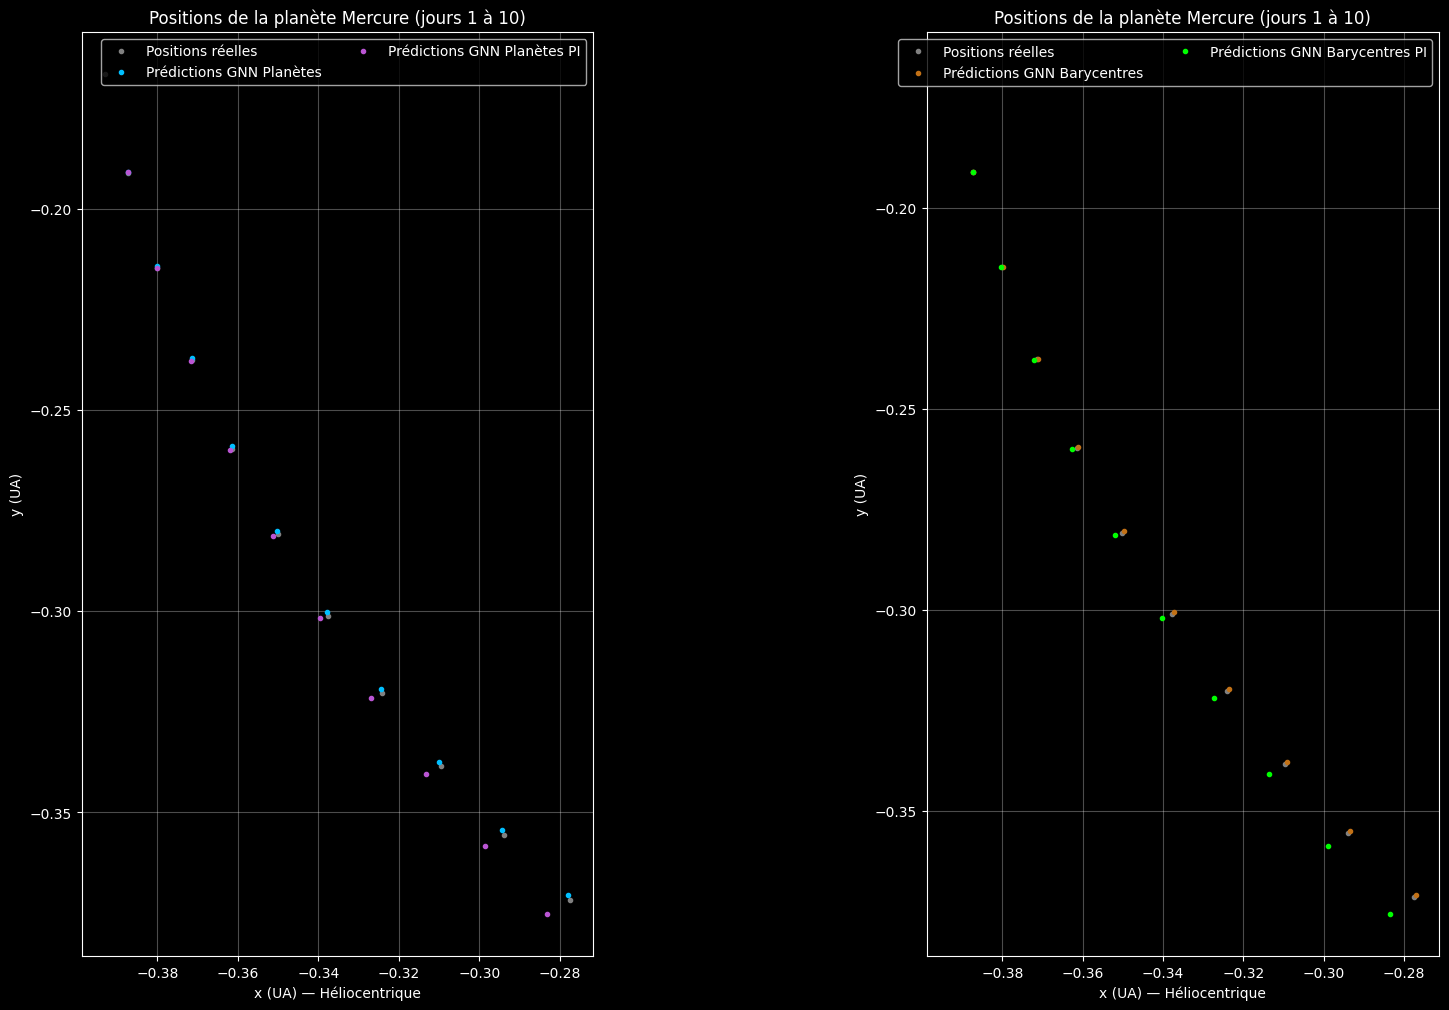

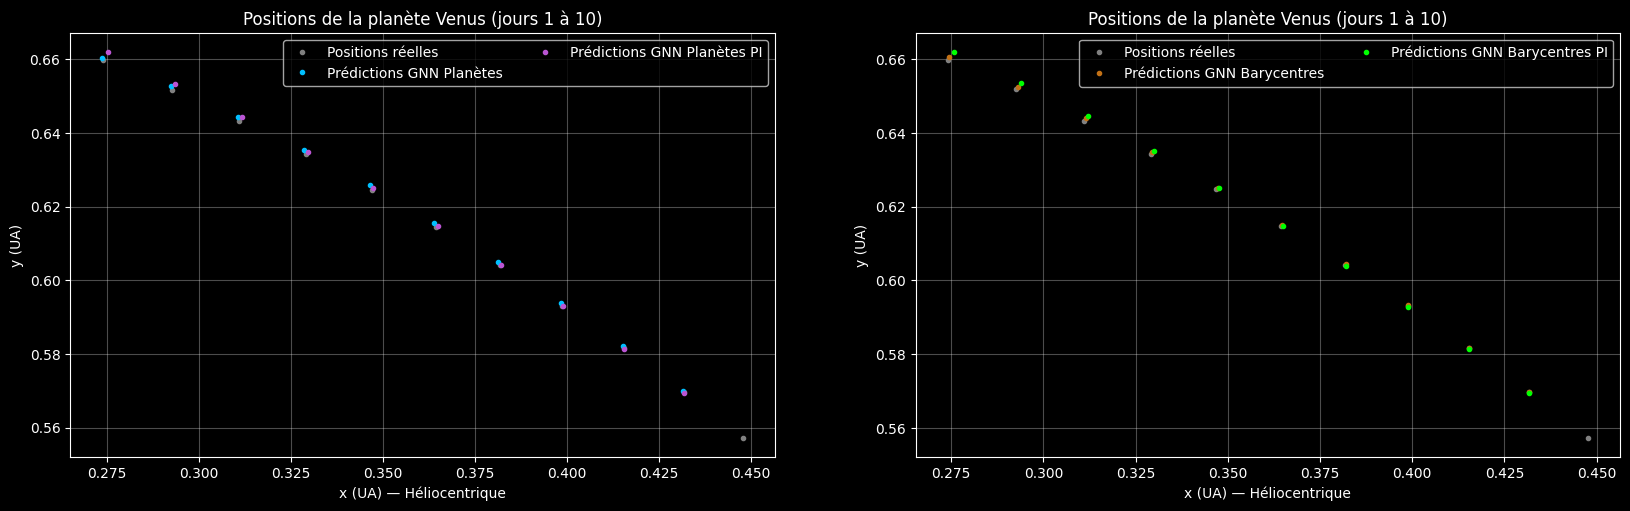

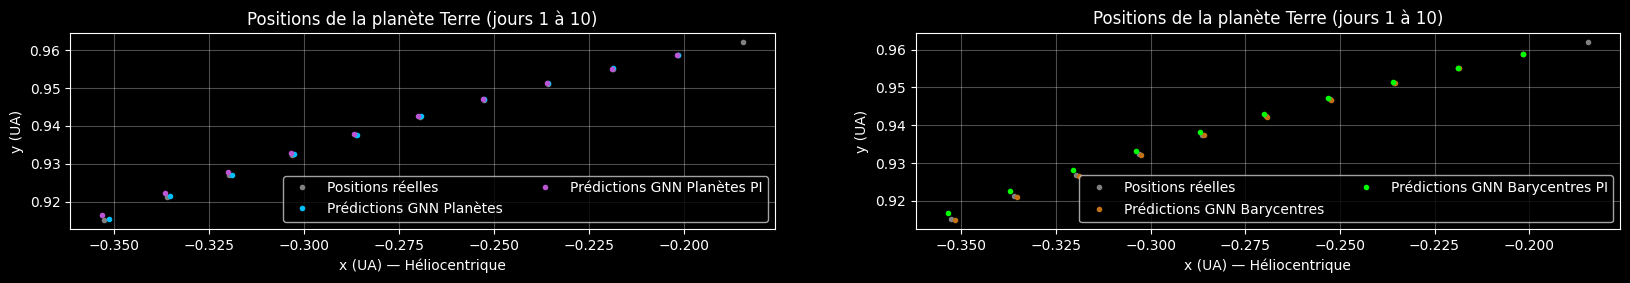

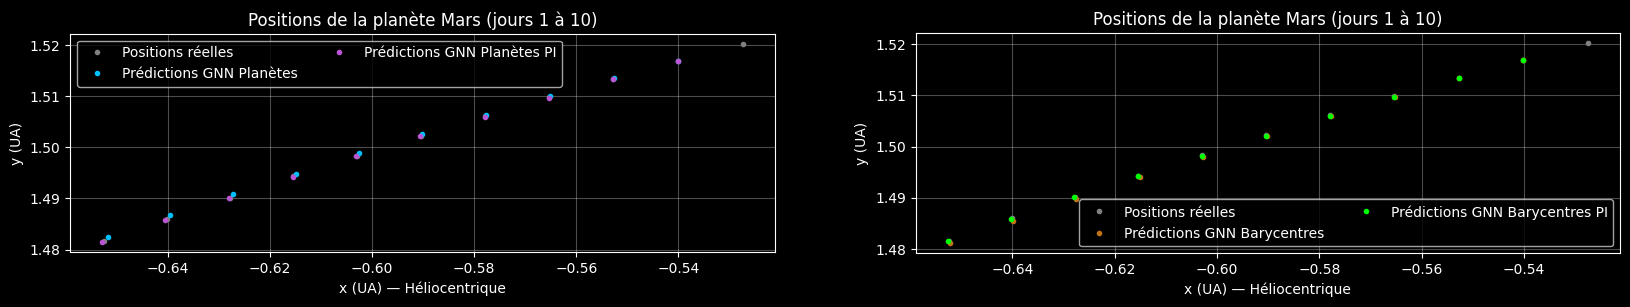

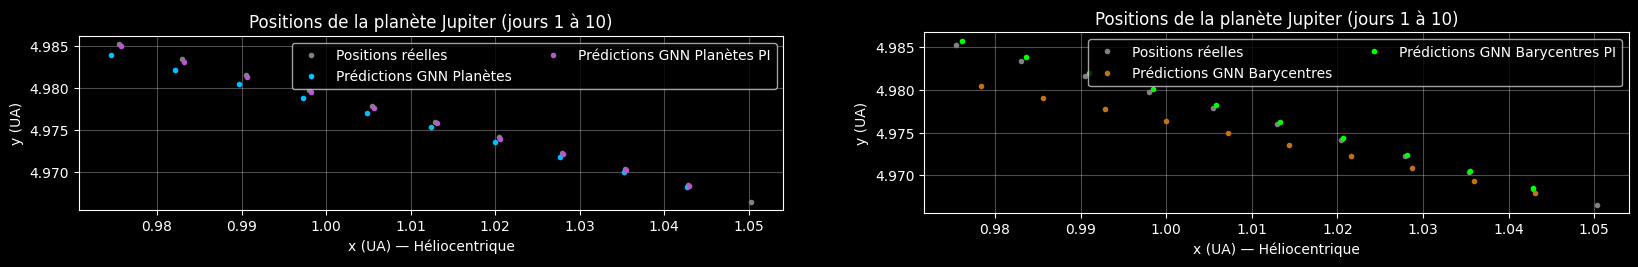

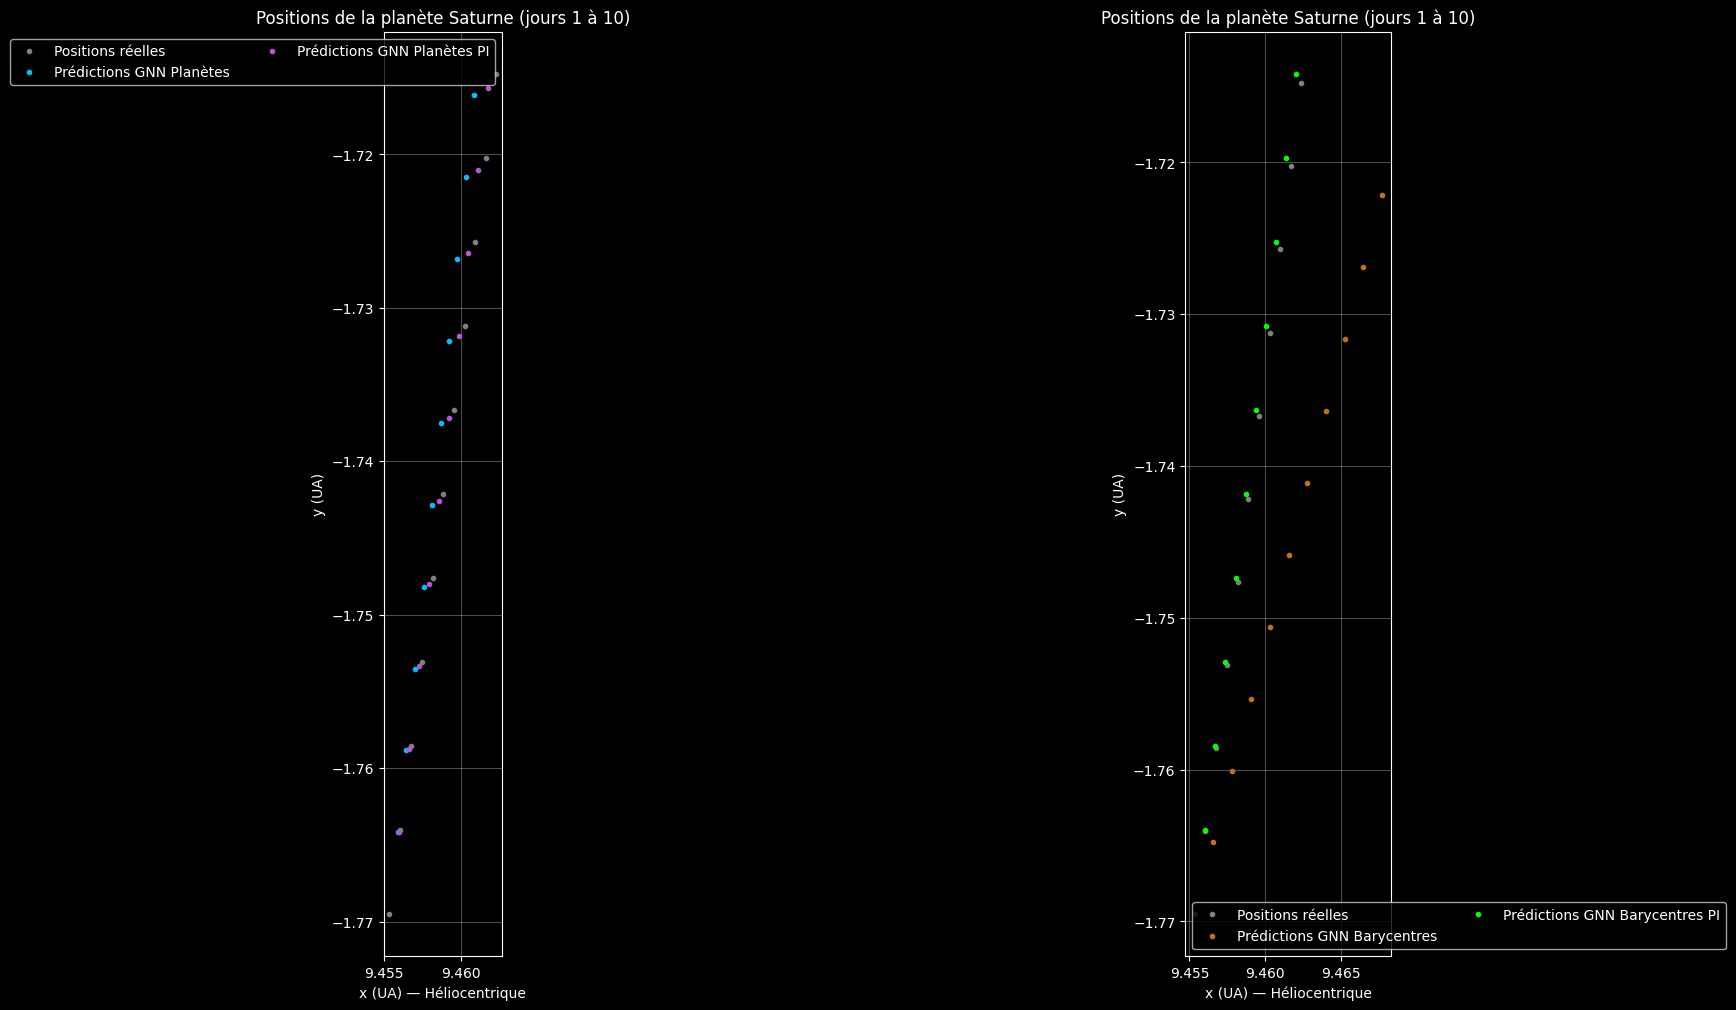

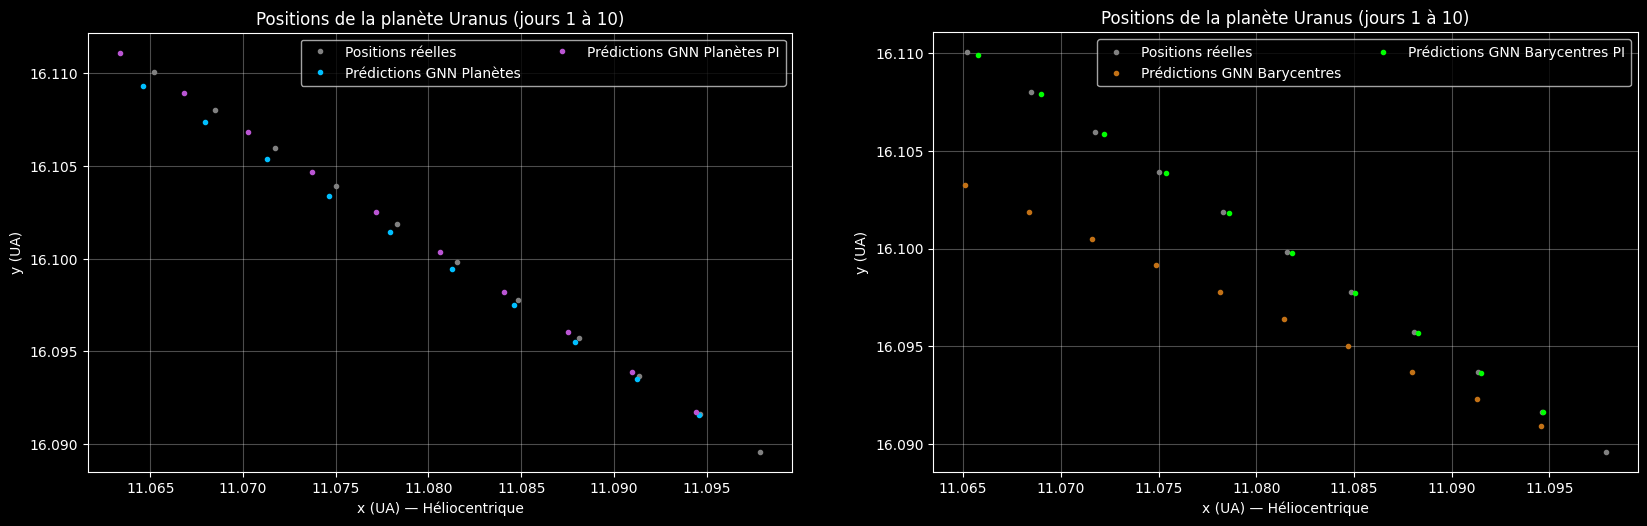

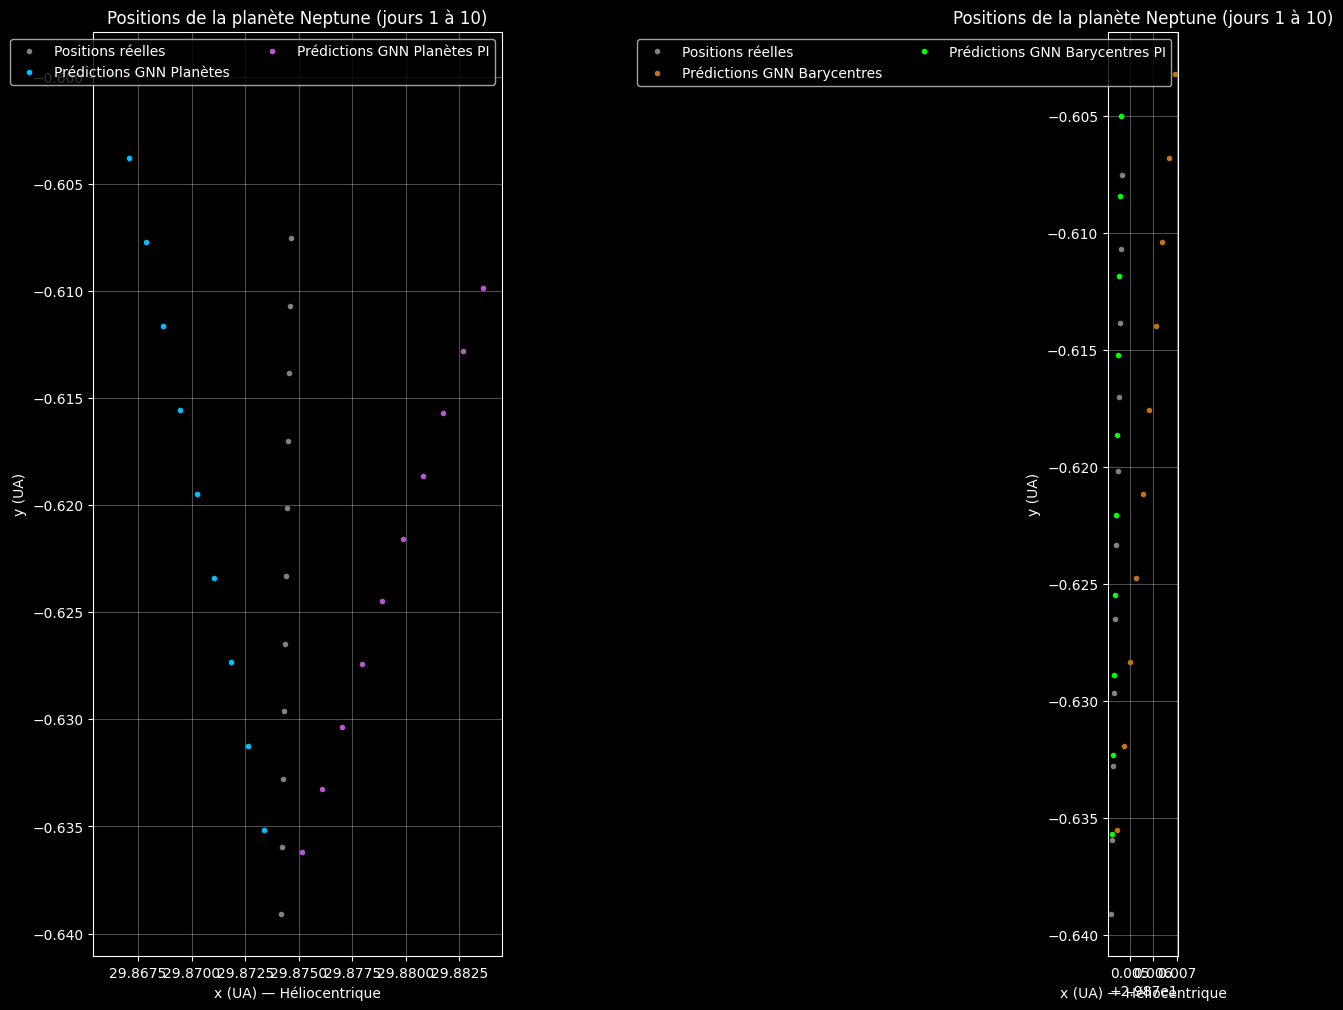

In [70]:
plot_planet_coordinates(num_days=10, show_sun=False)

### 3.2. Trajectoires sur 25 jours

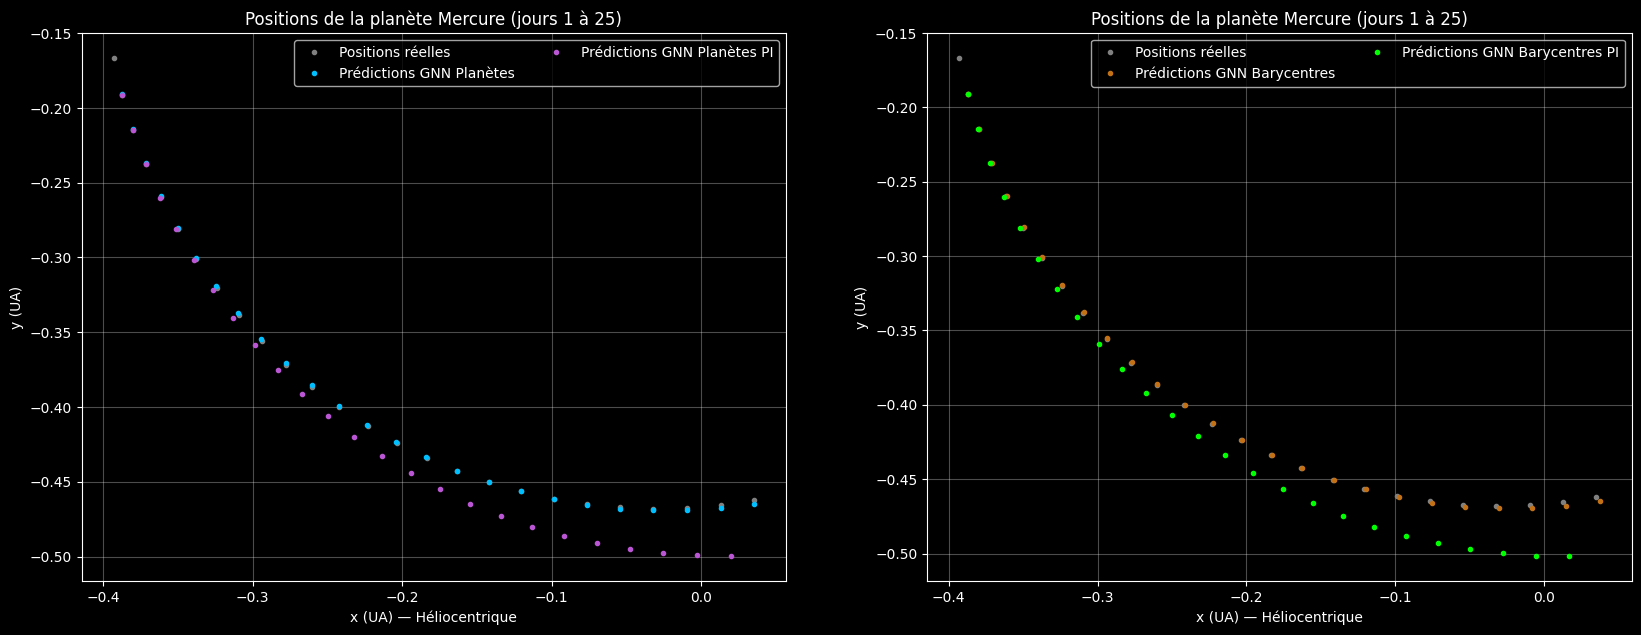

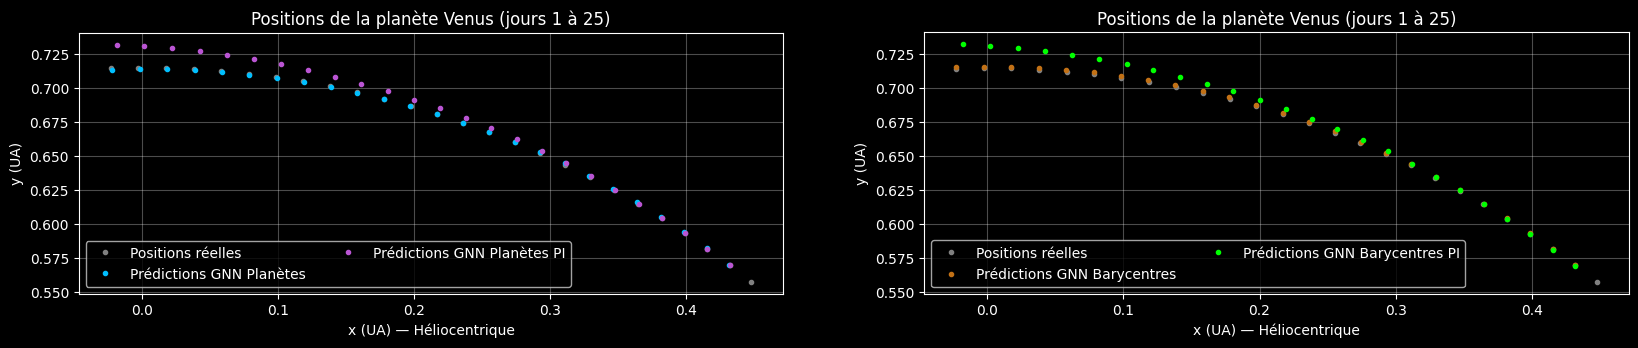

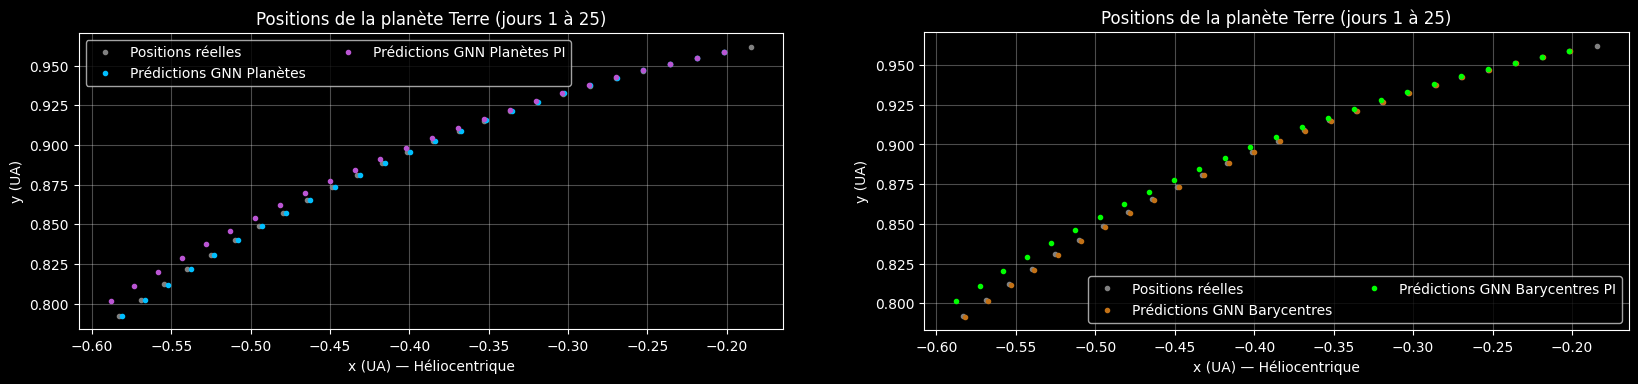

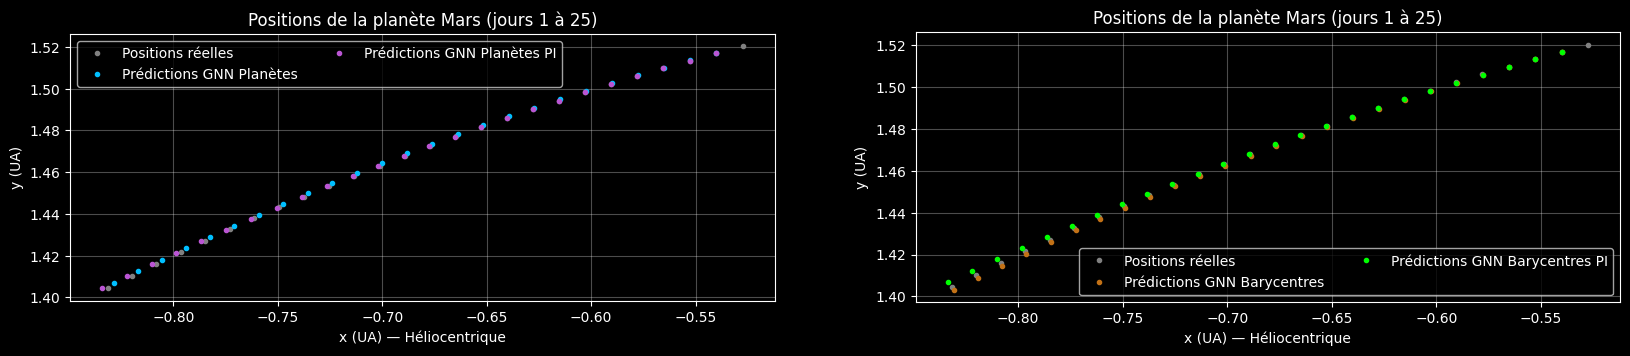

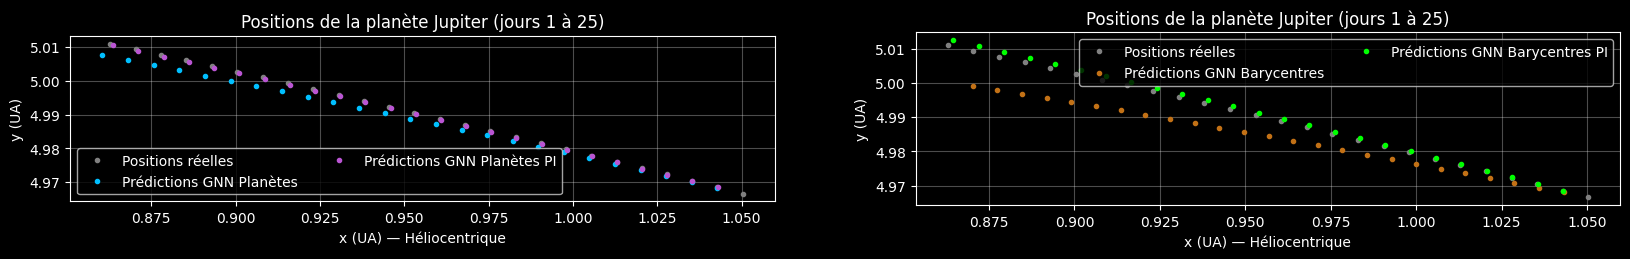

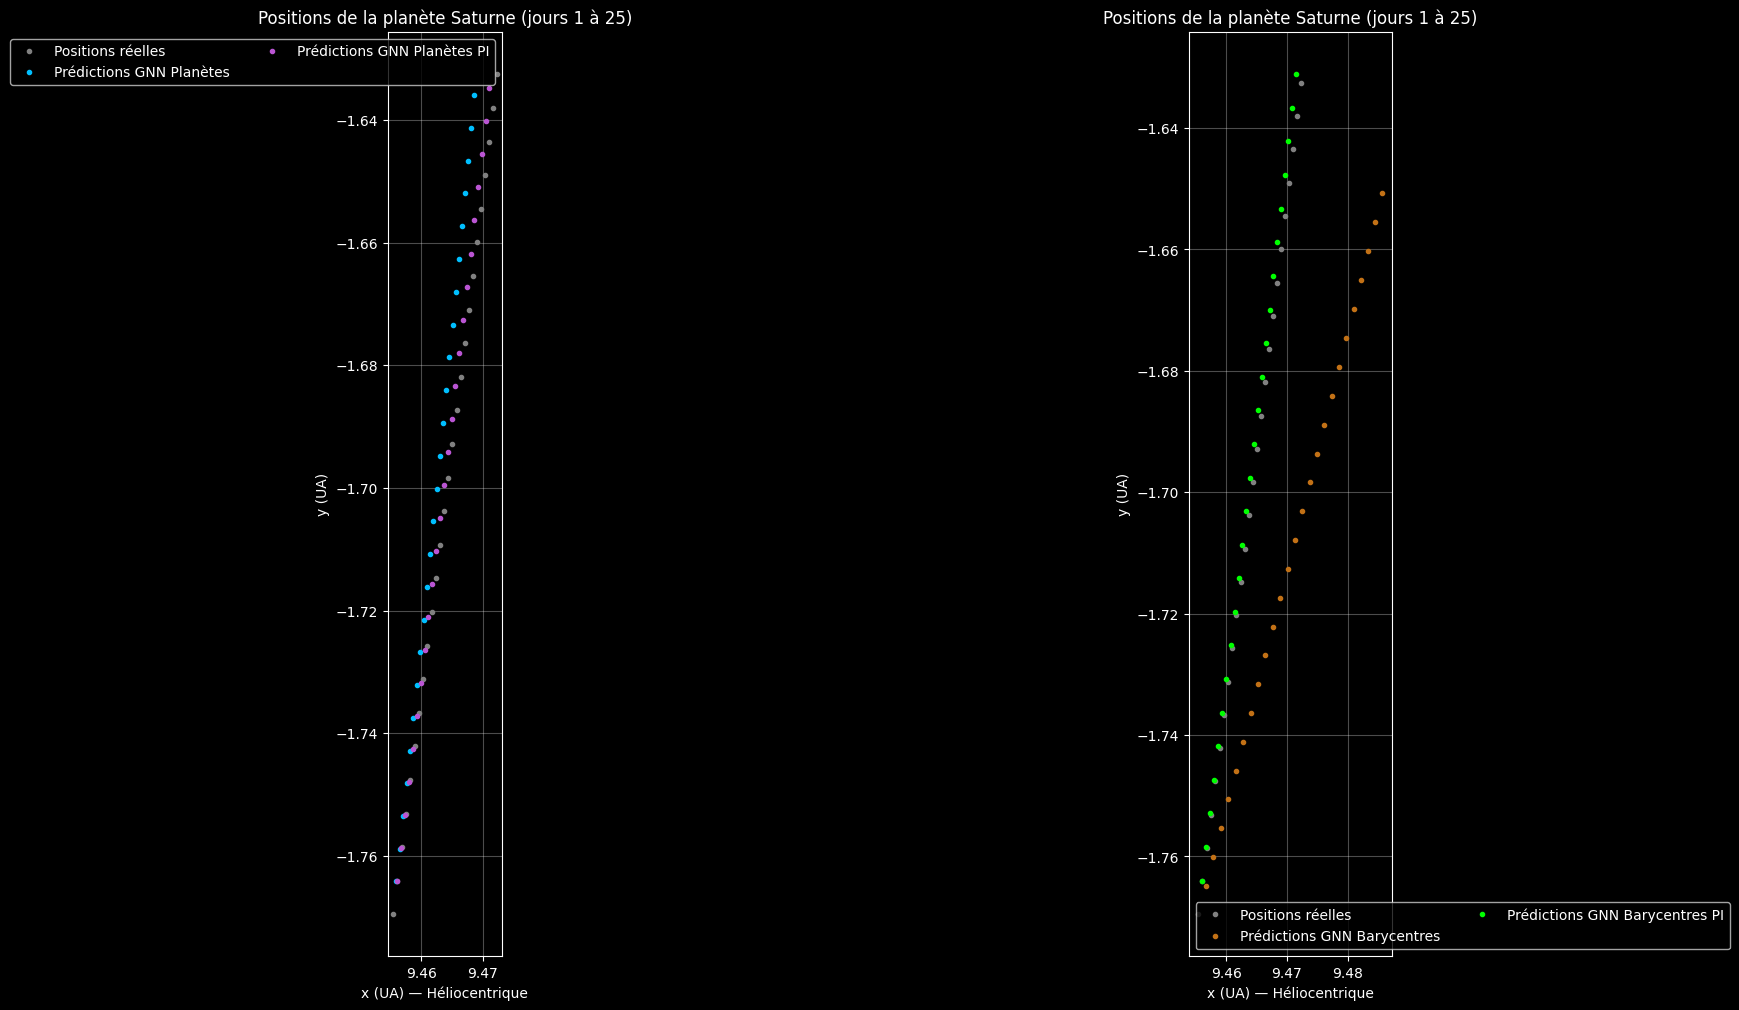

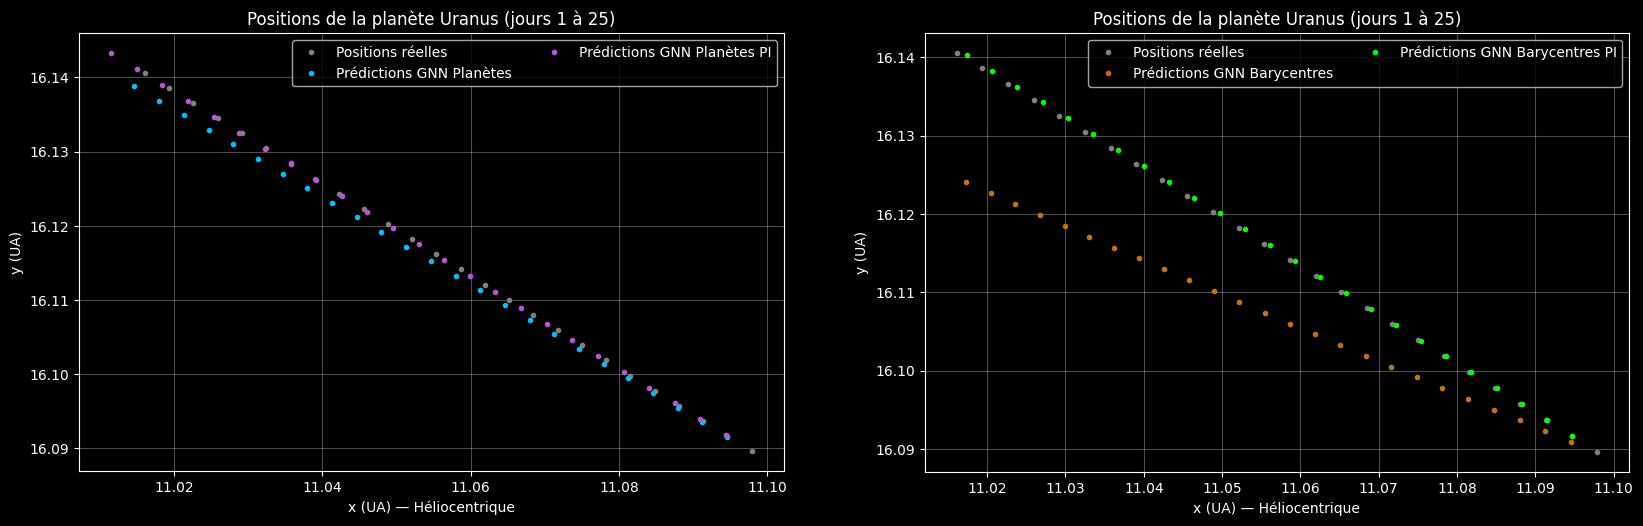

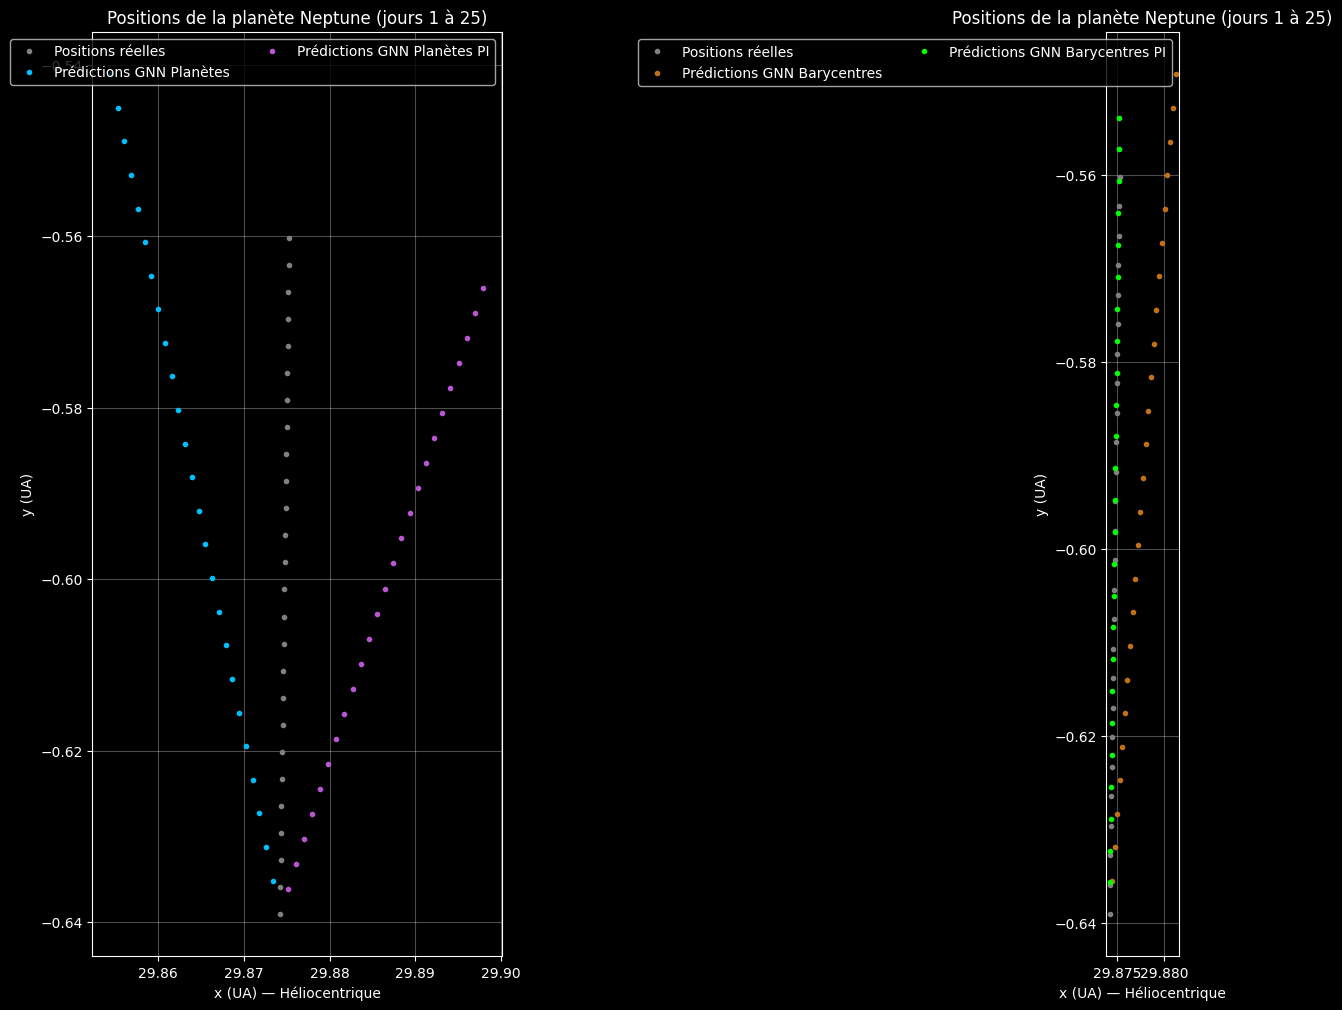

In [68]:
plot_planet_coordinates(num_days=25, show_sun=False)

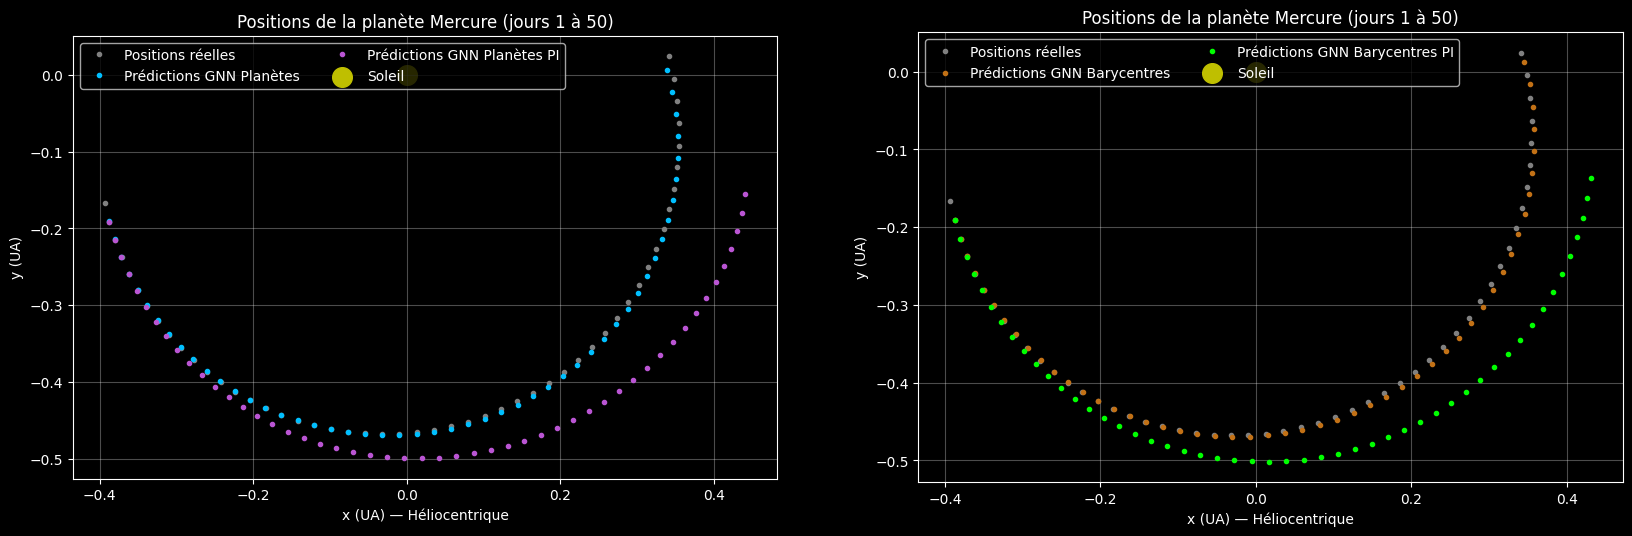

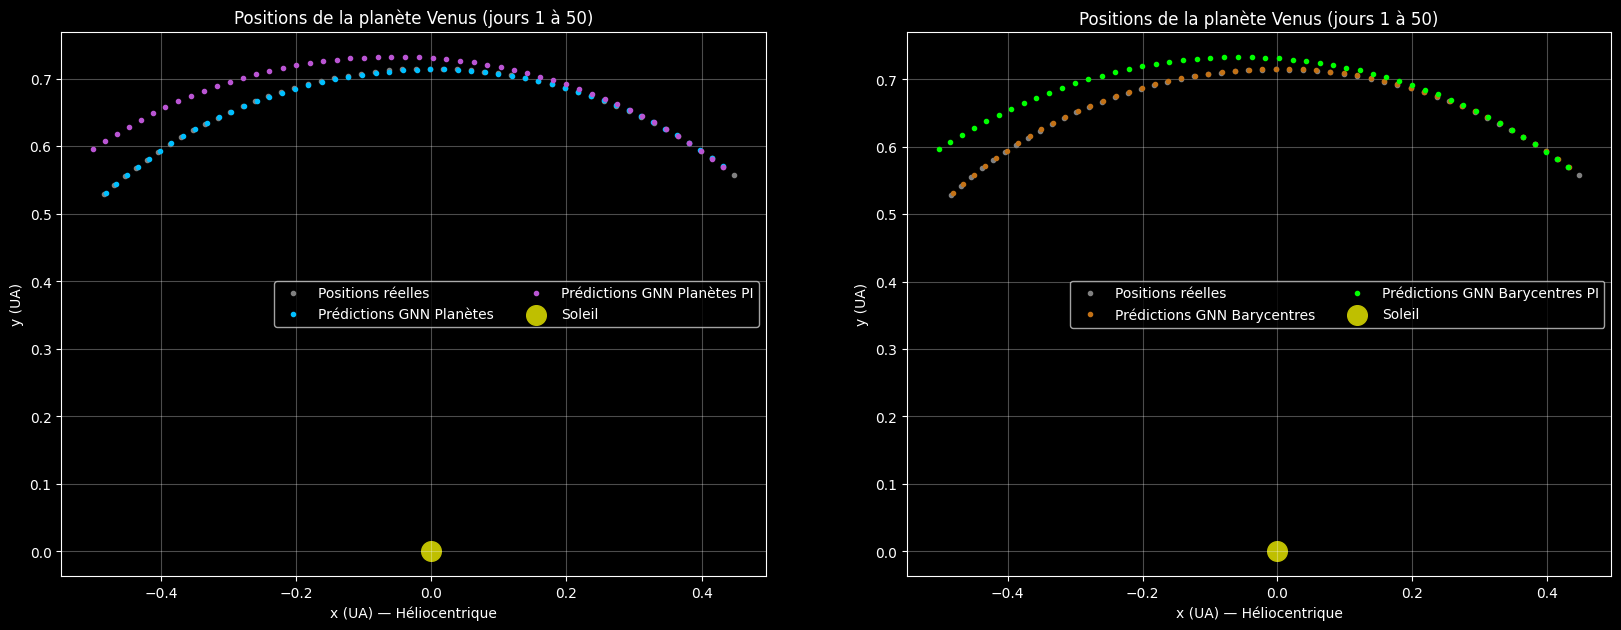

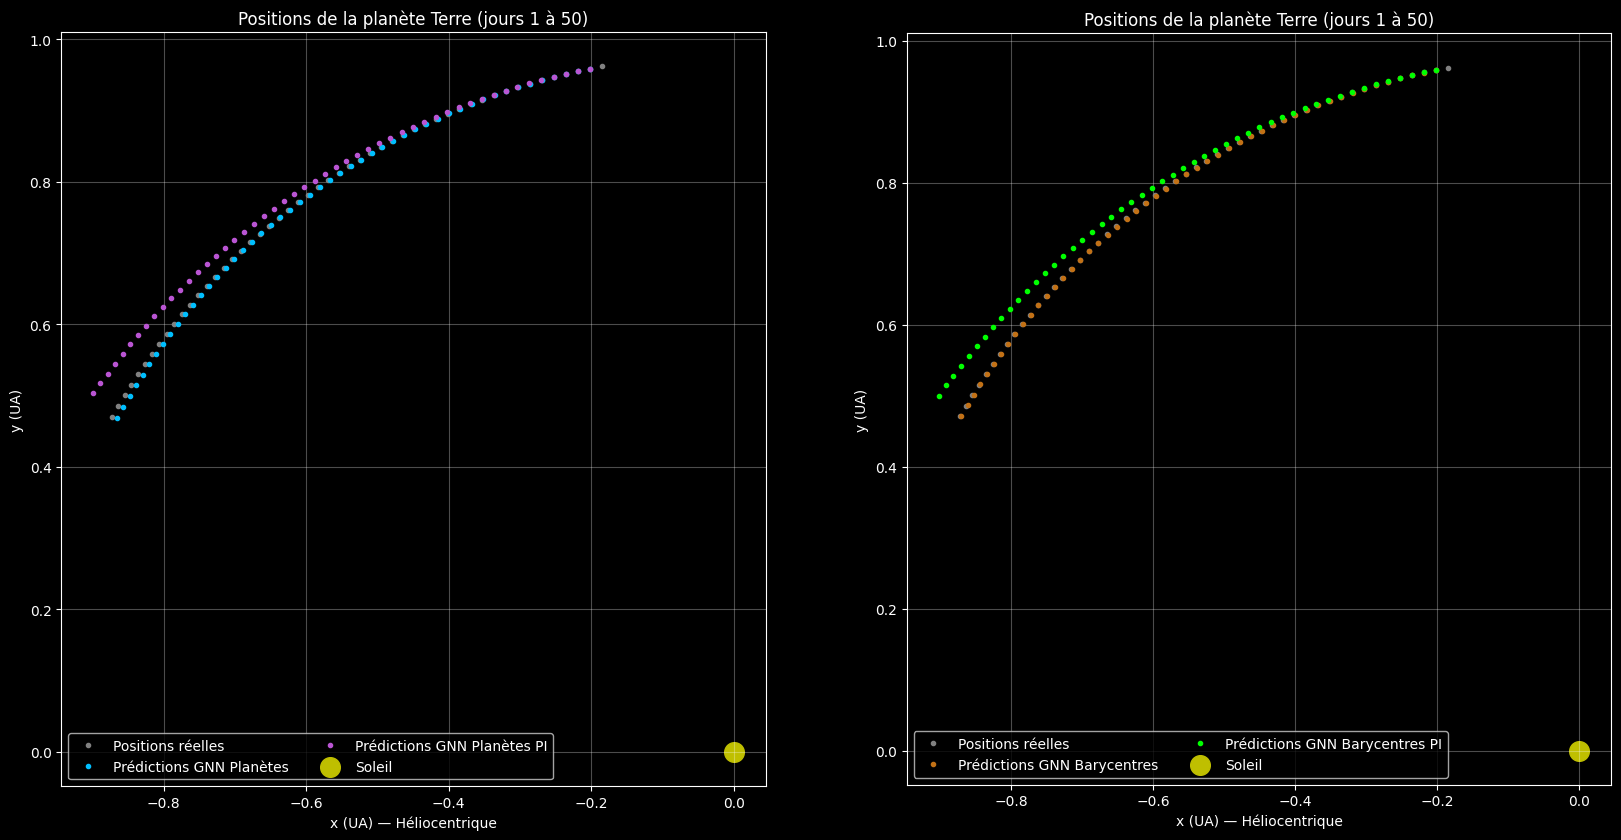

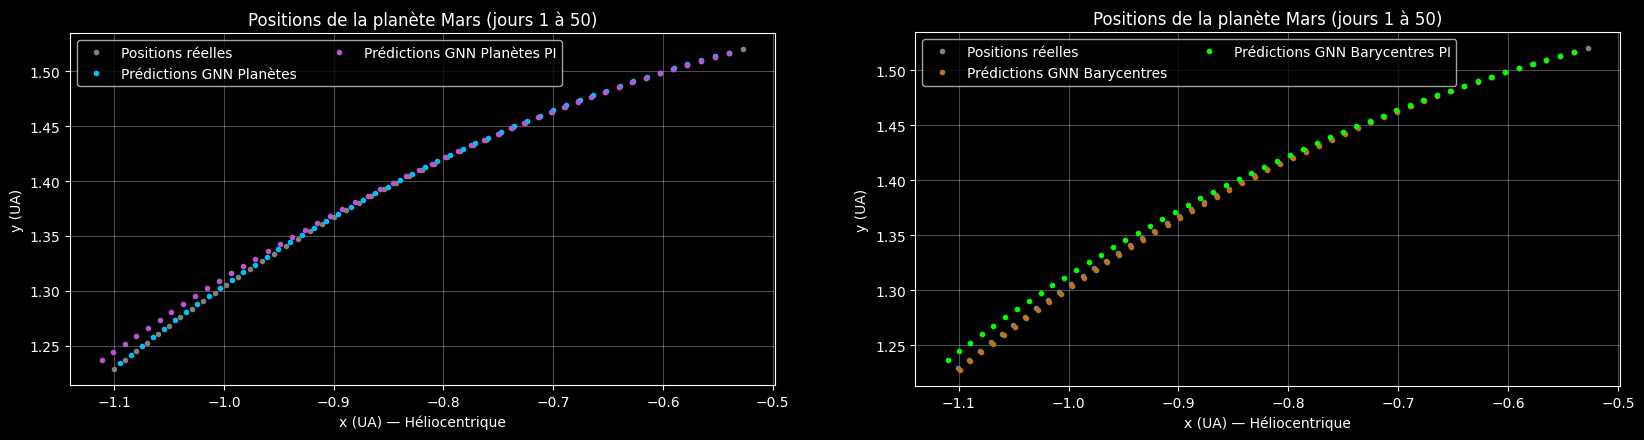

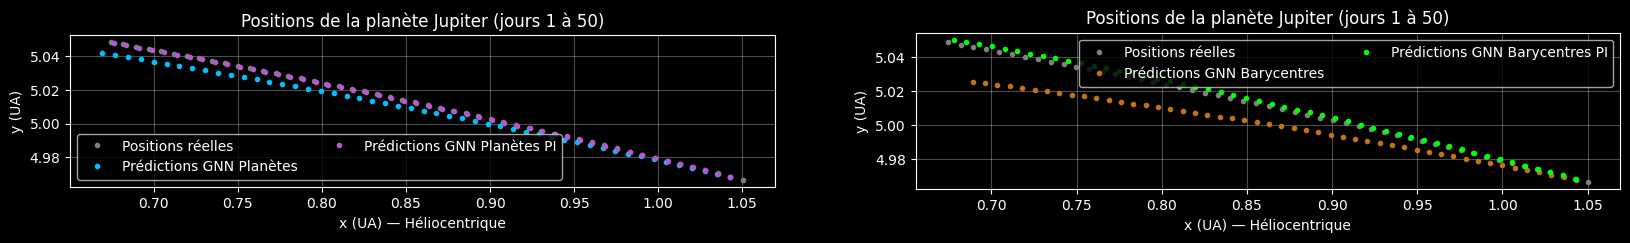

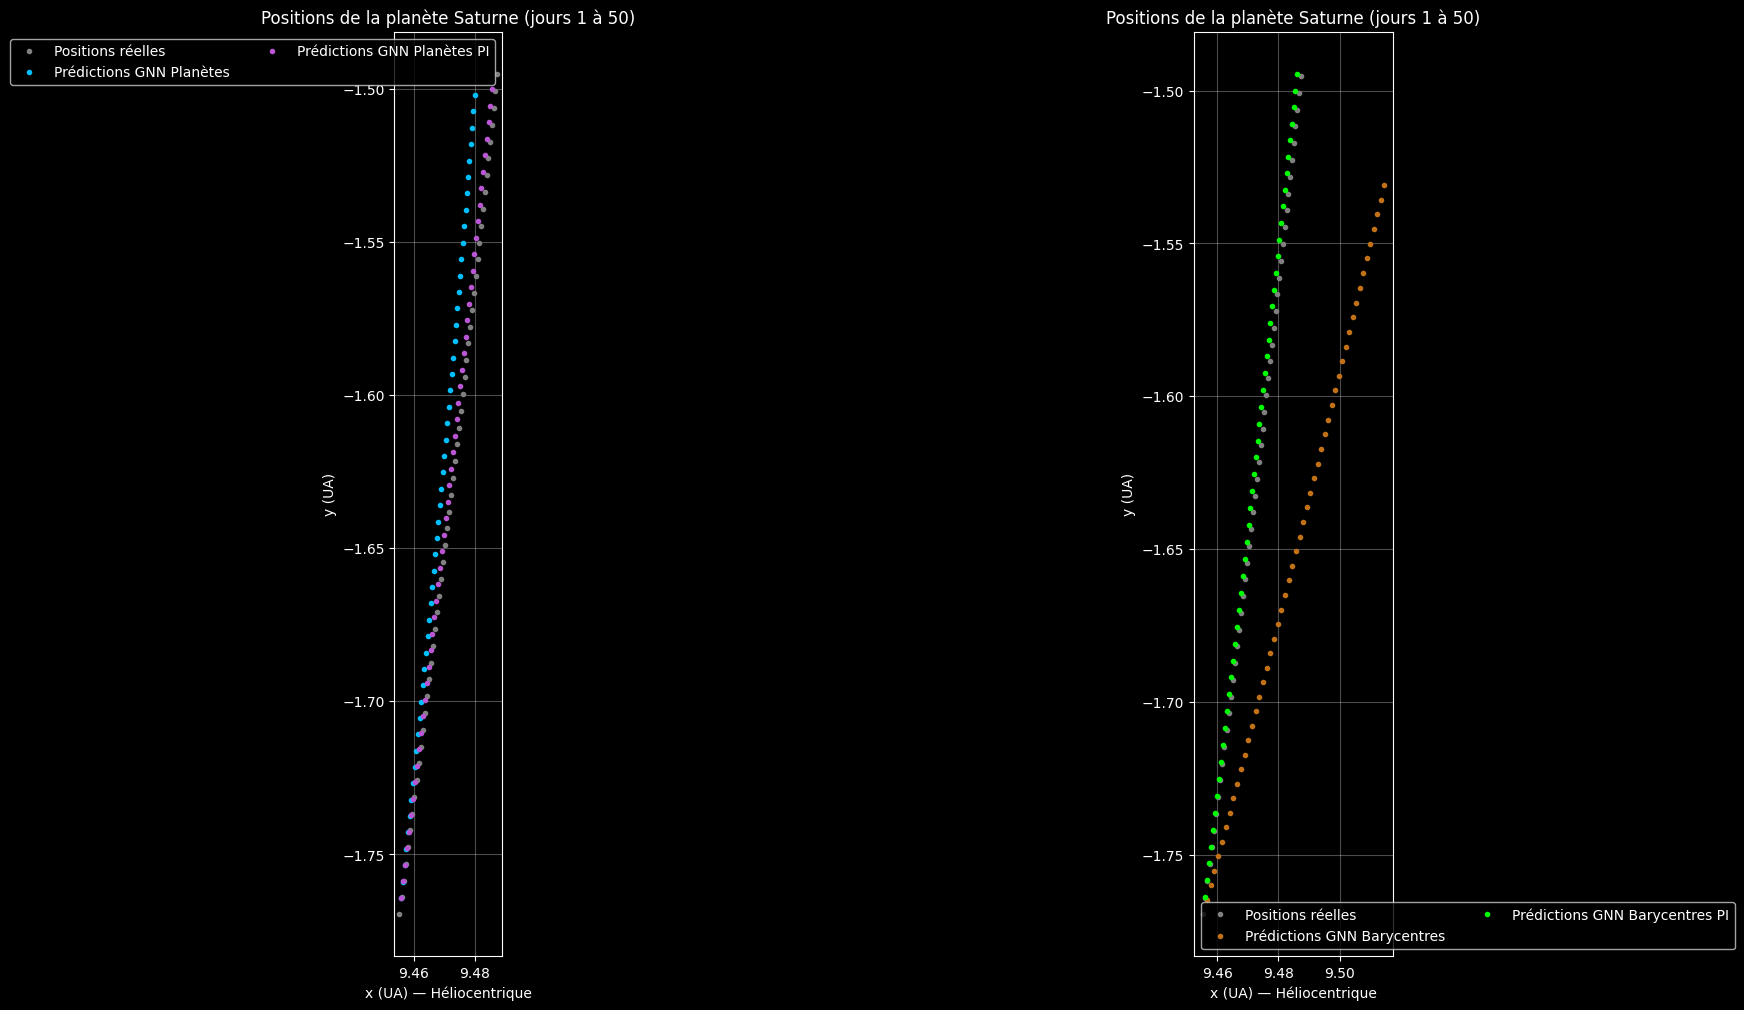

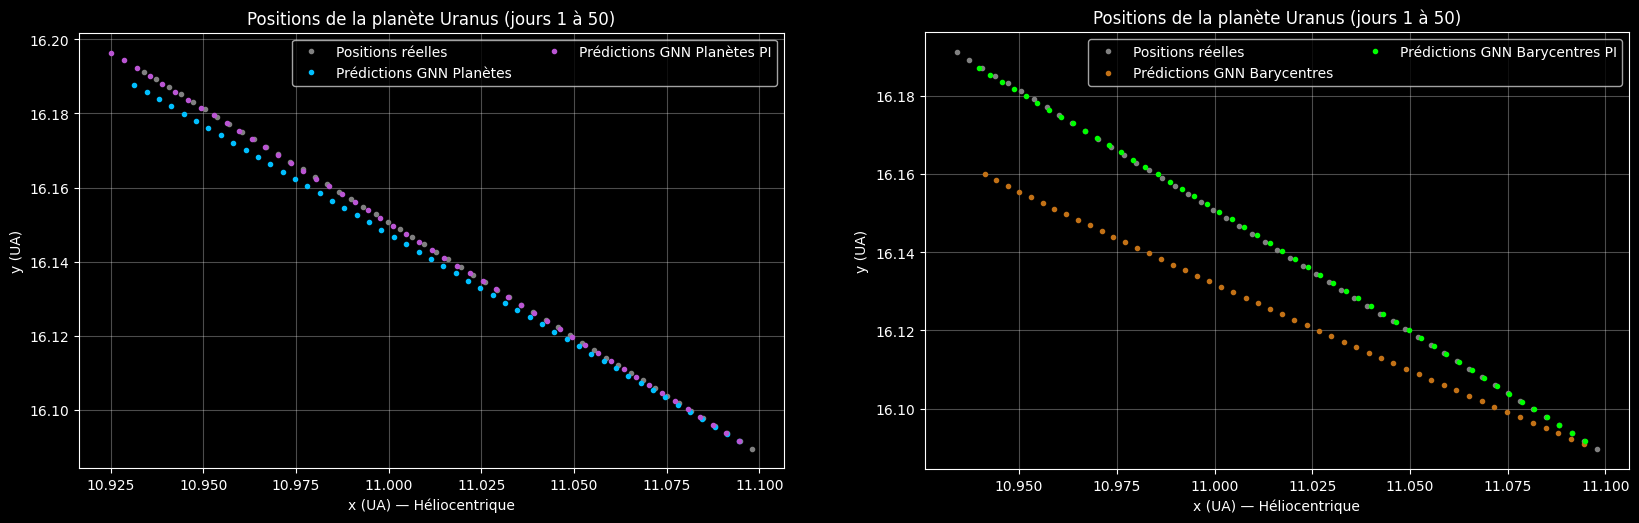

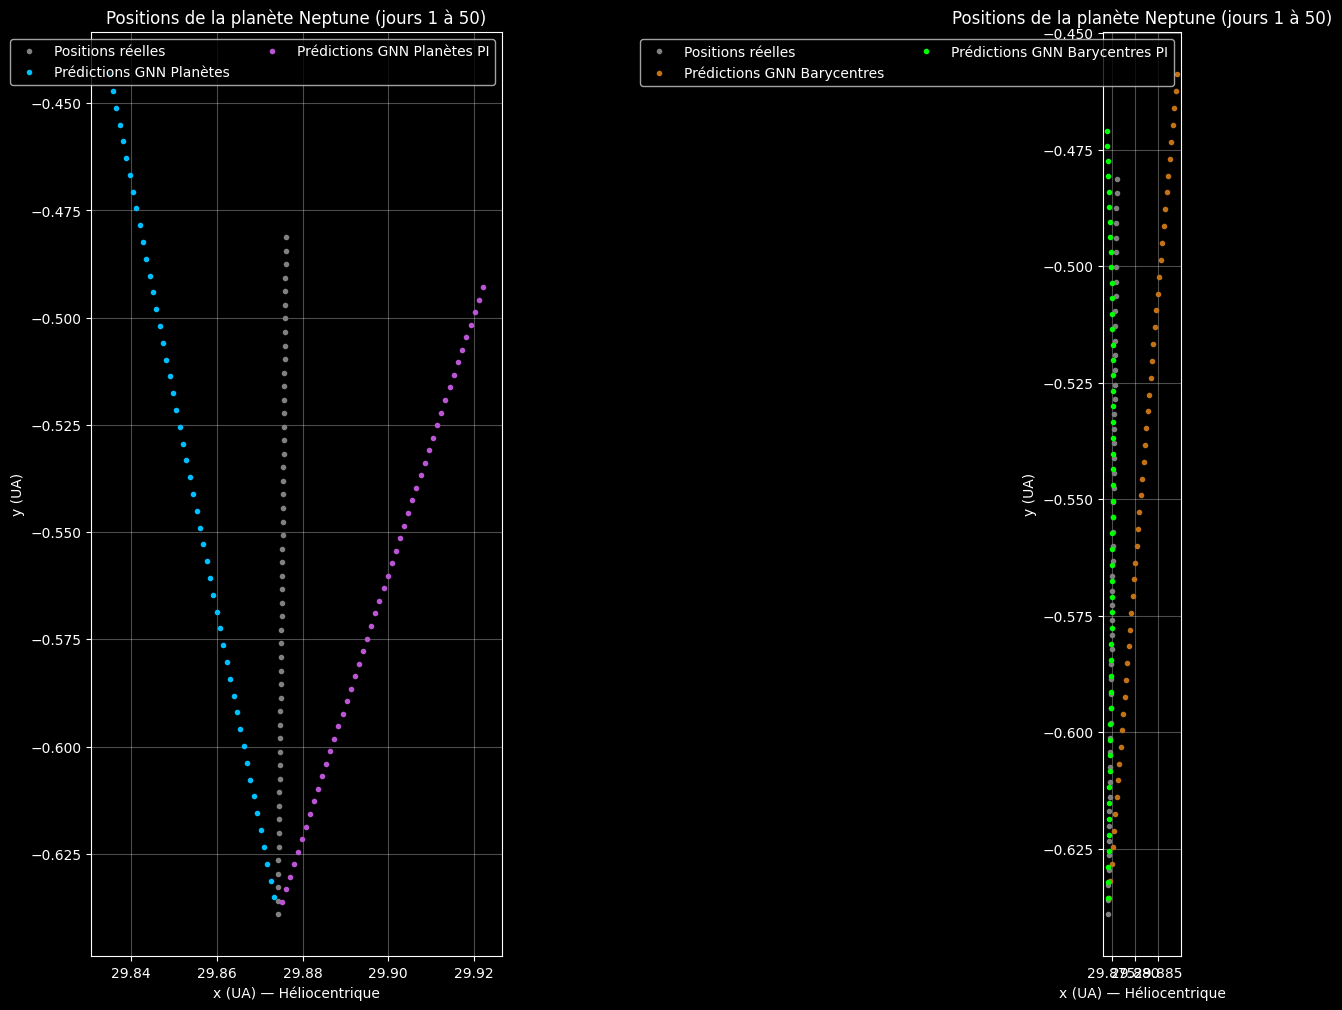

In [71]:
plot_planet_coordinates(num_days=50)

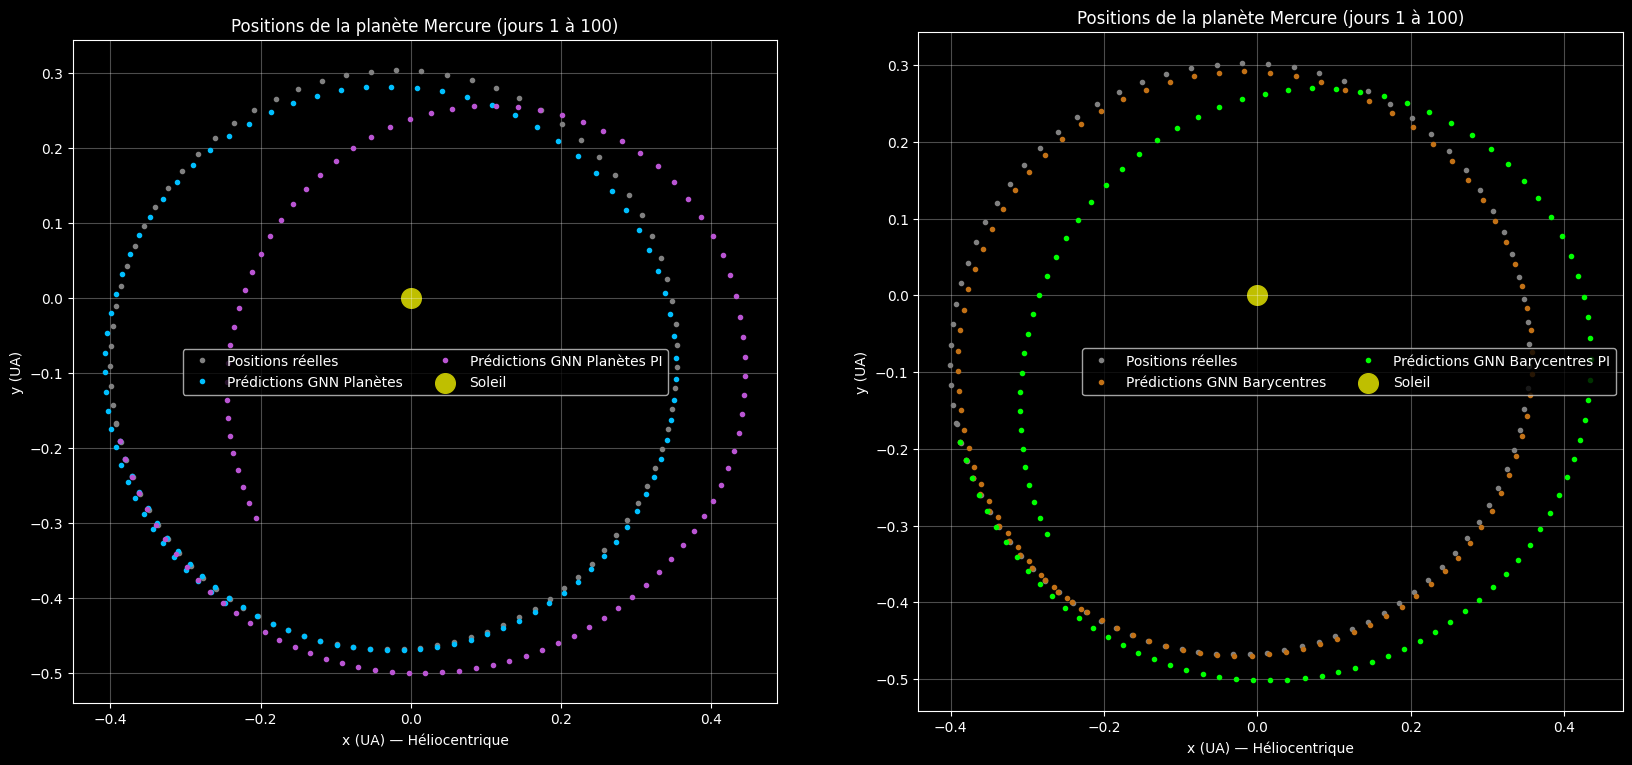

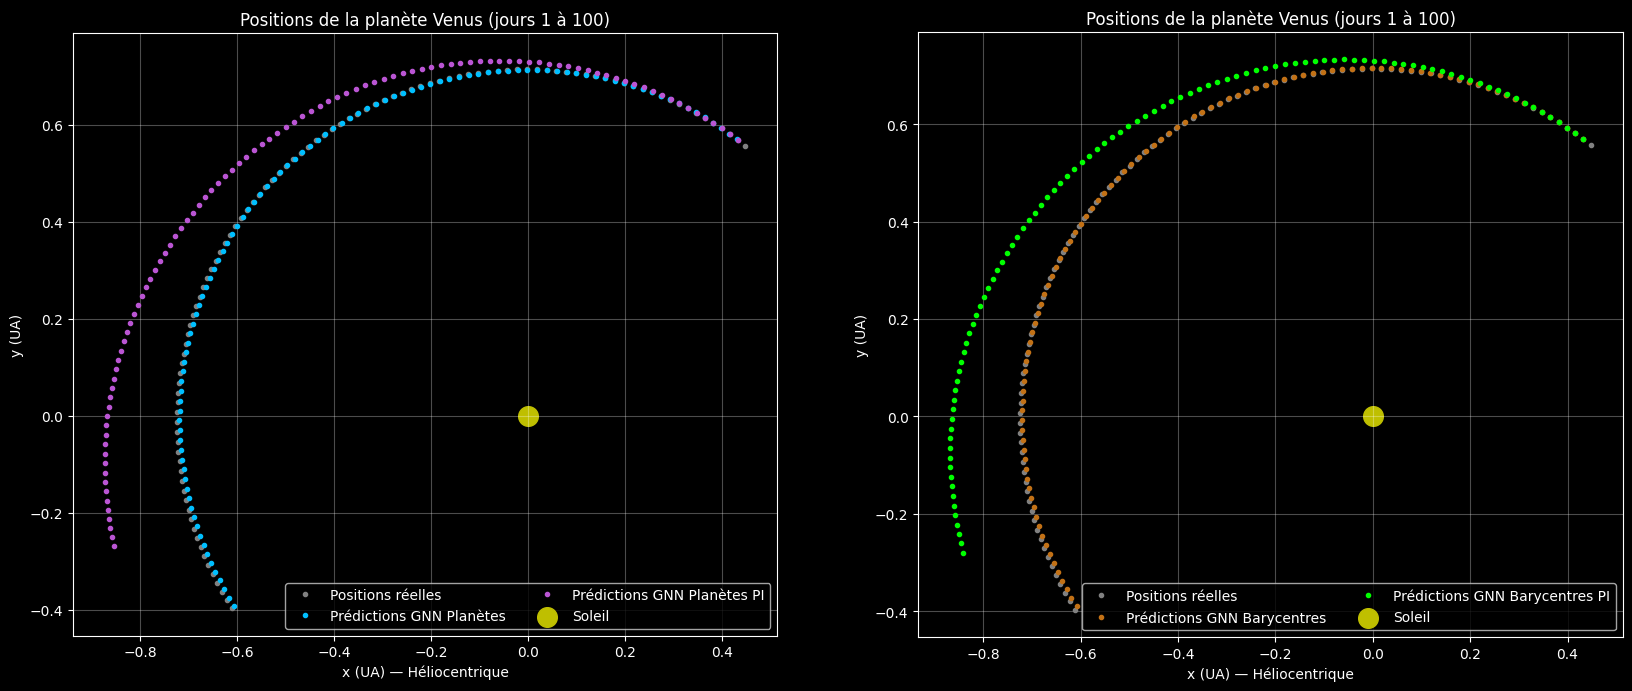

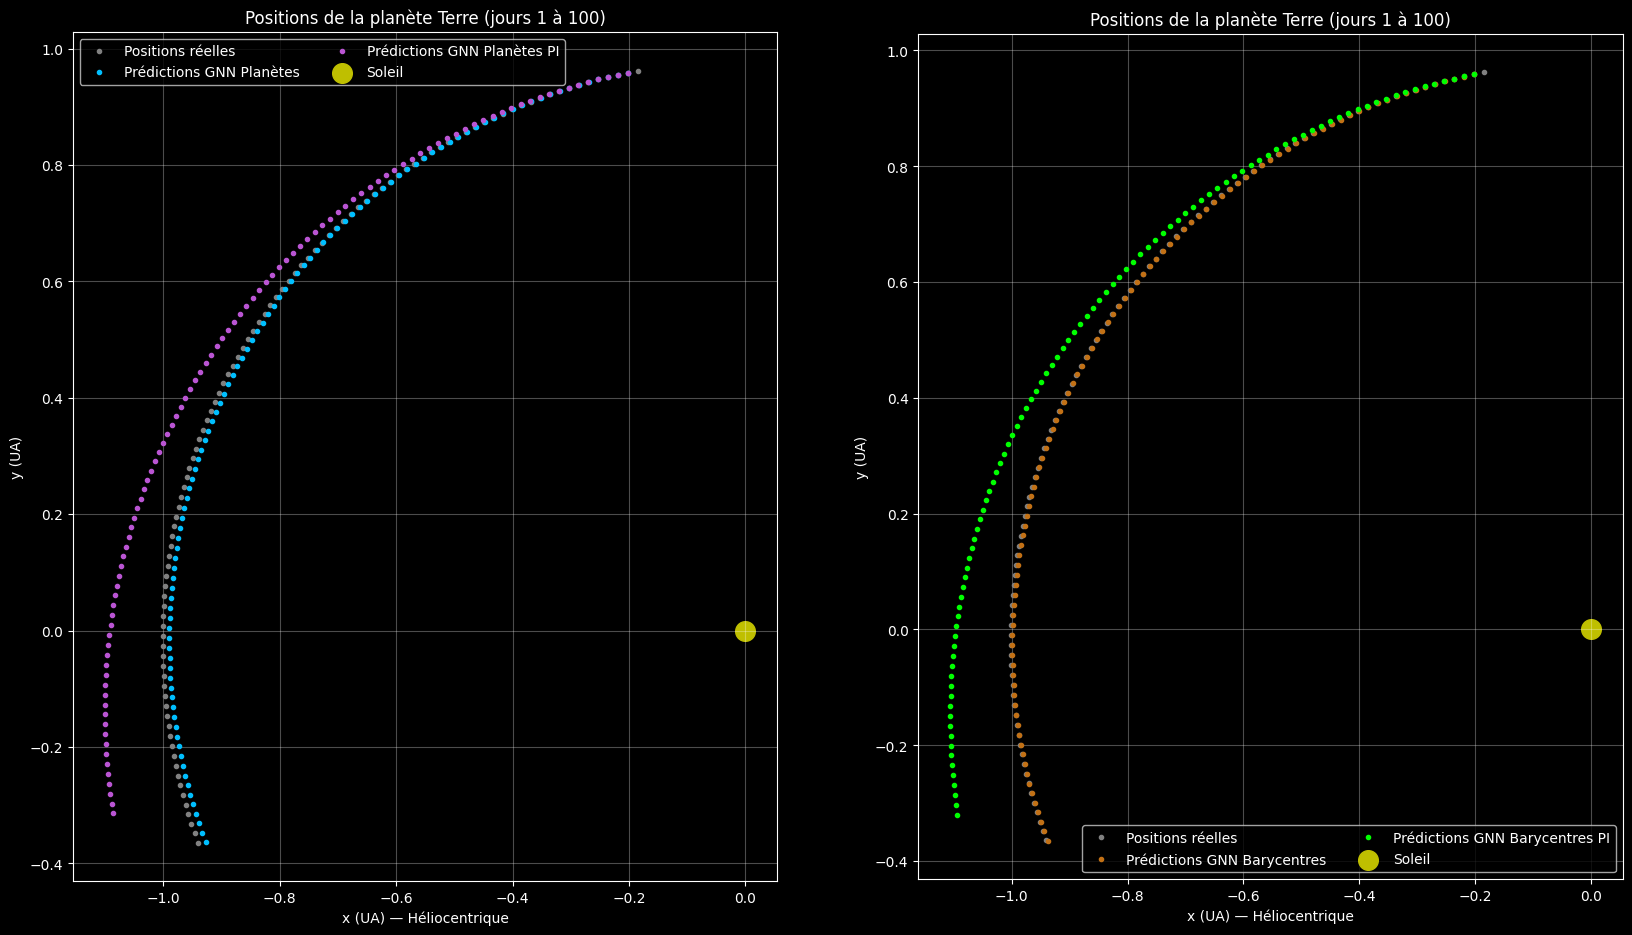

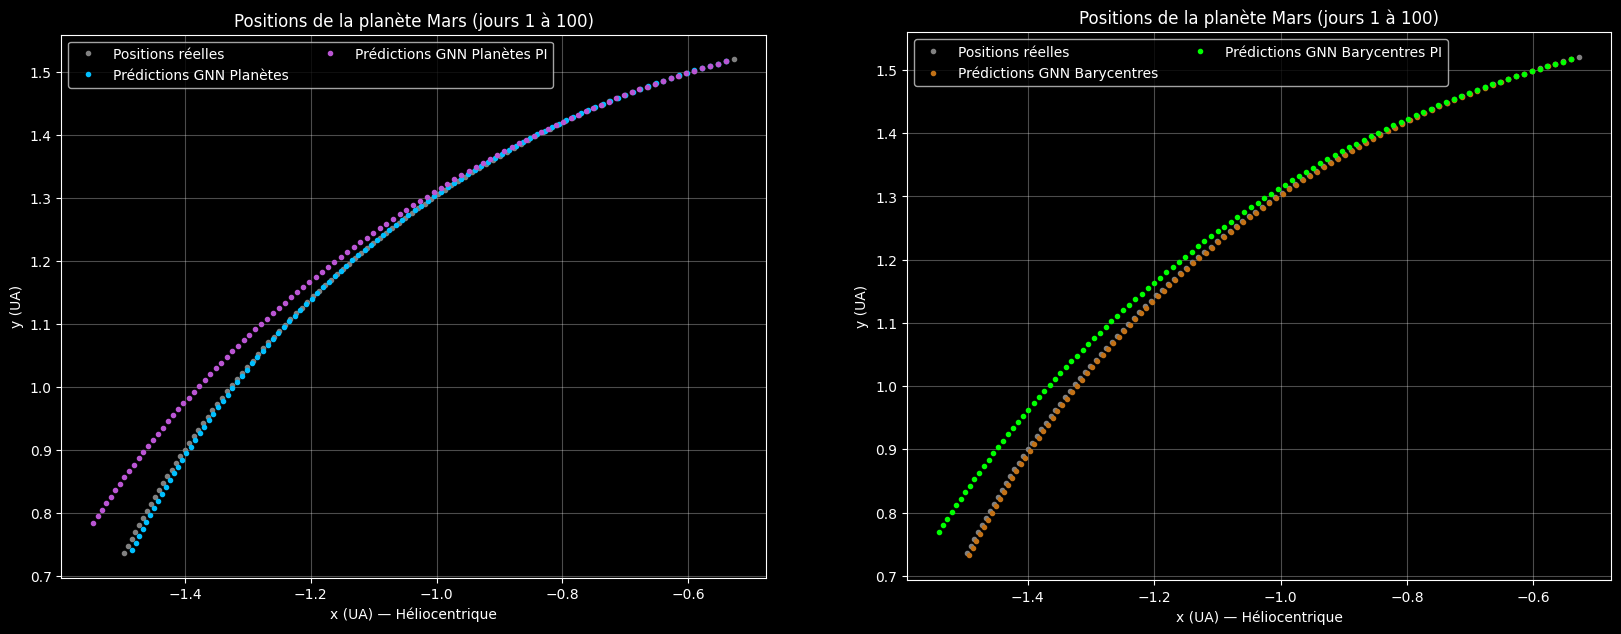

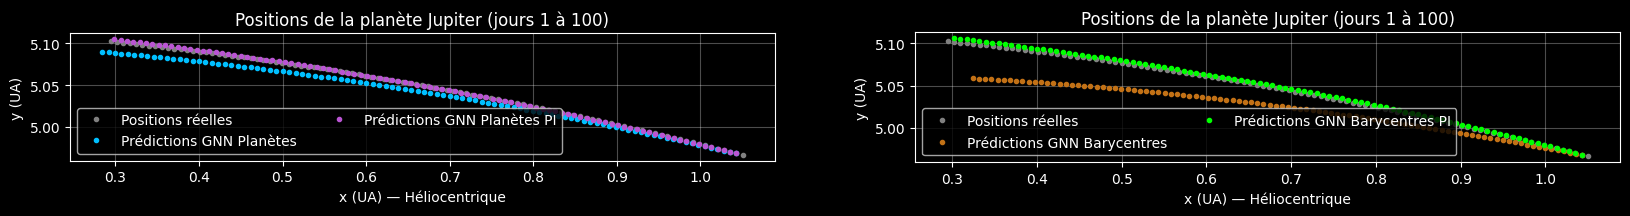

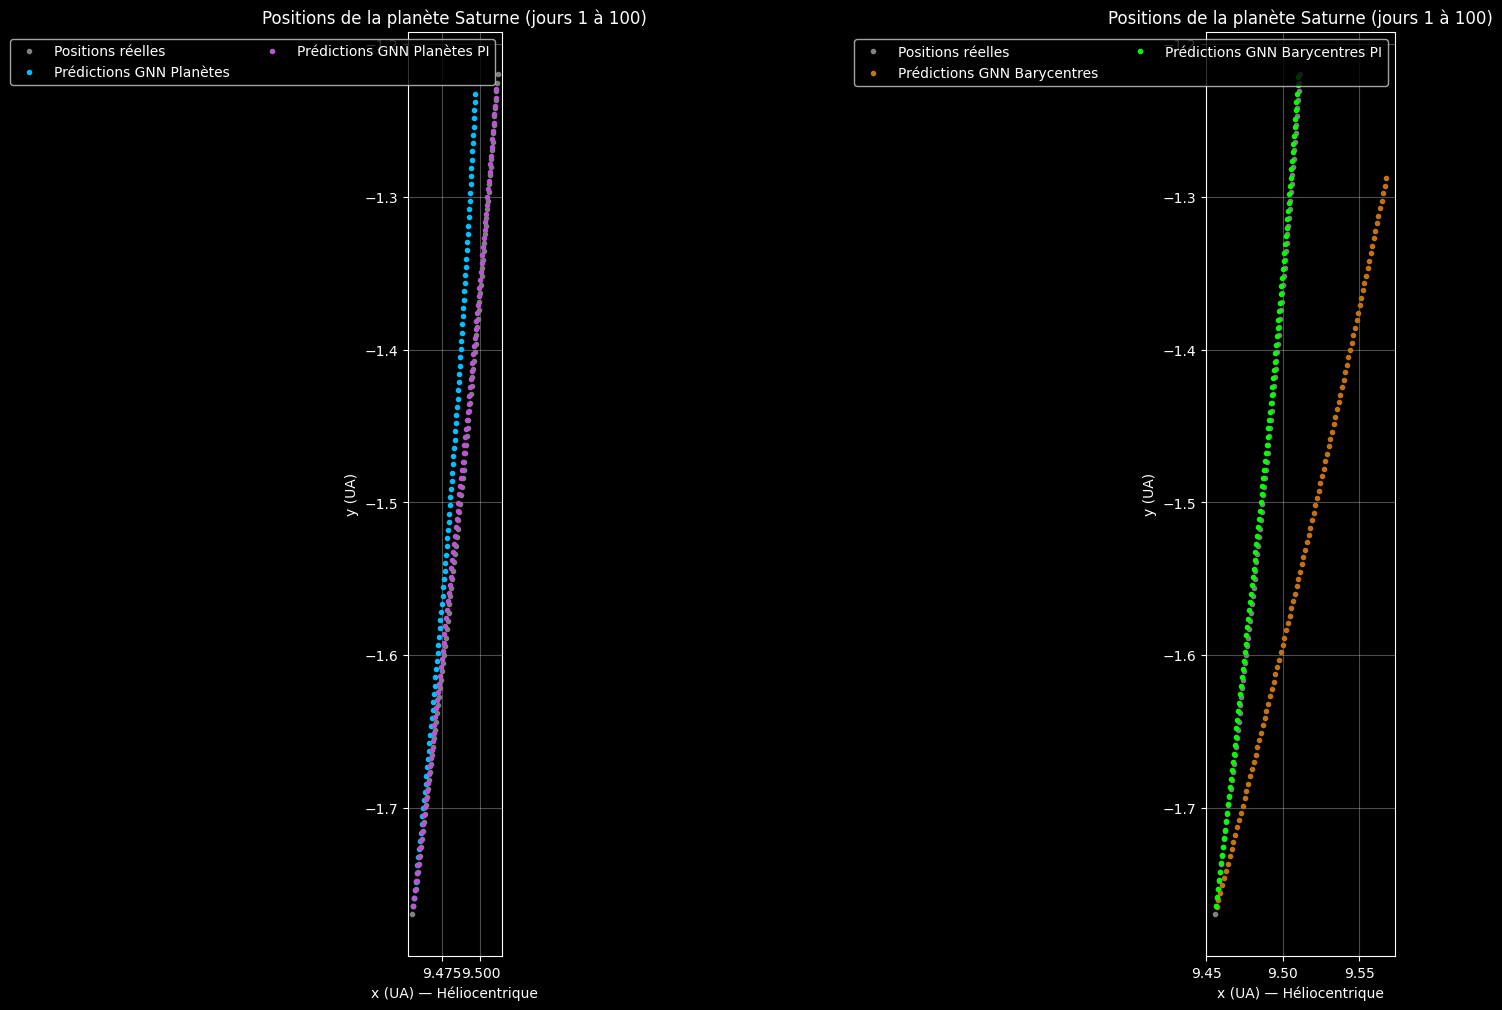

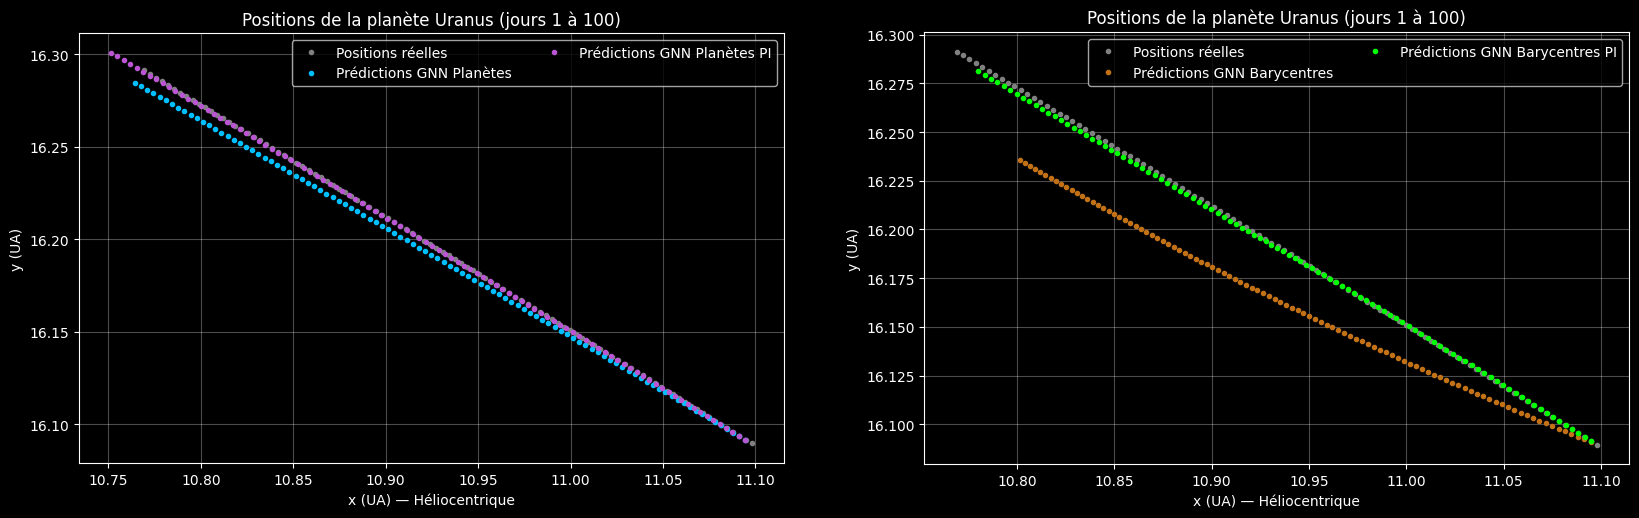

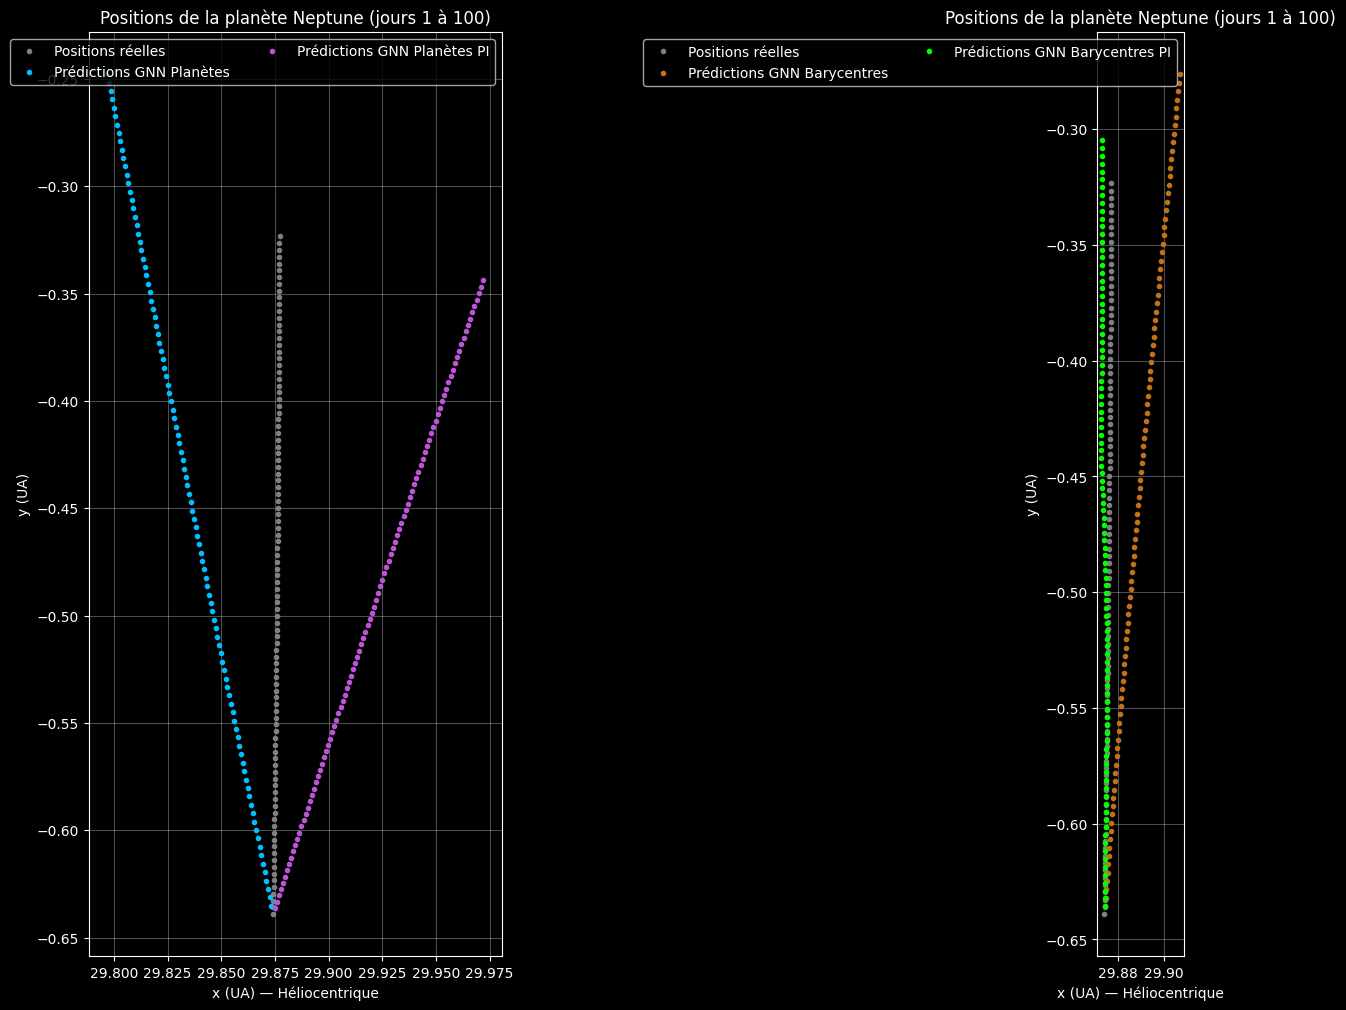

In [72]:
plot_planet_coordinates(num_days=100)

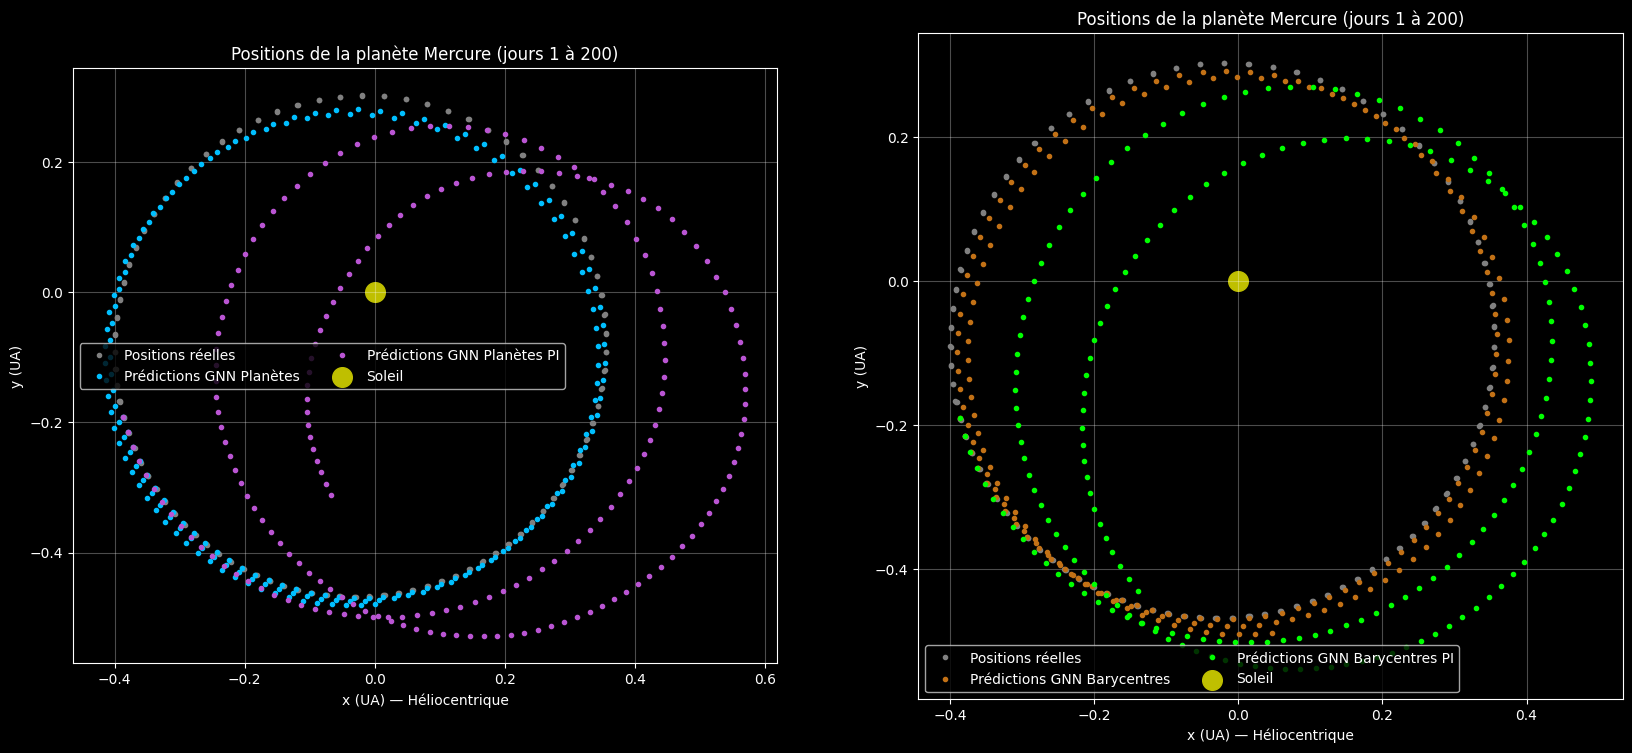

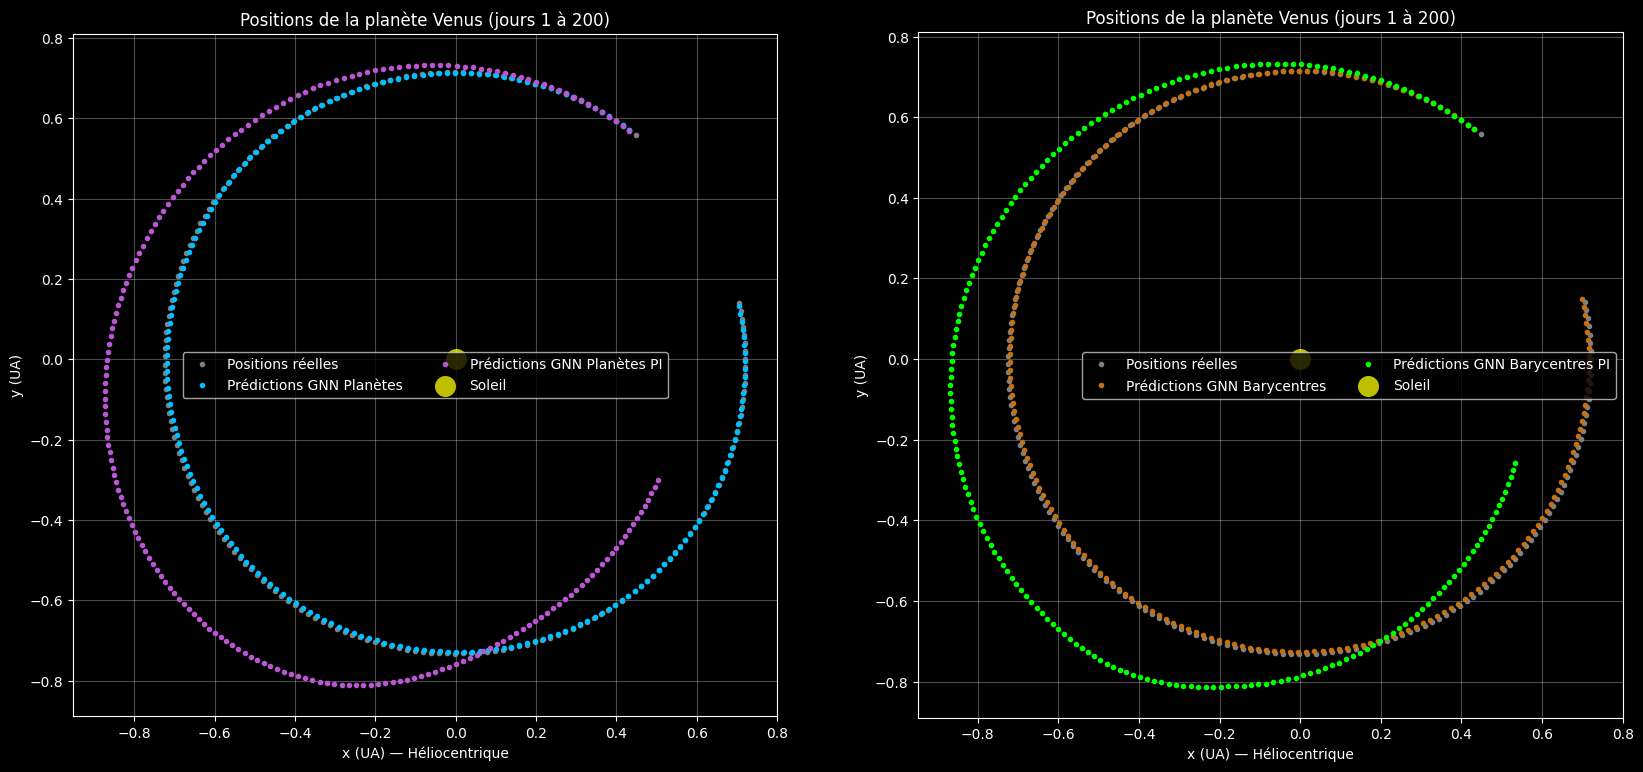

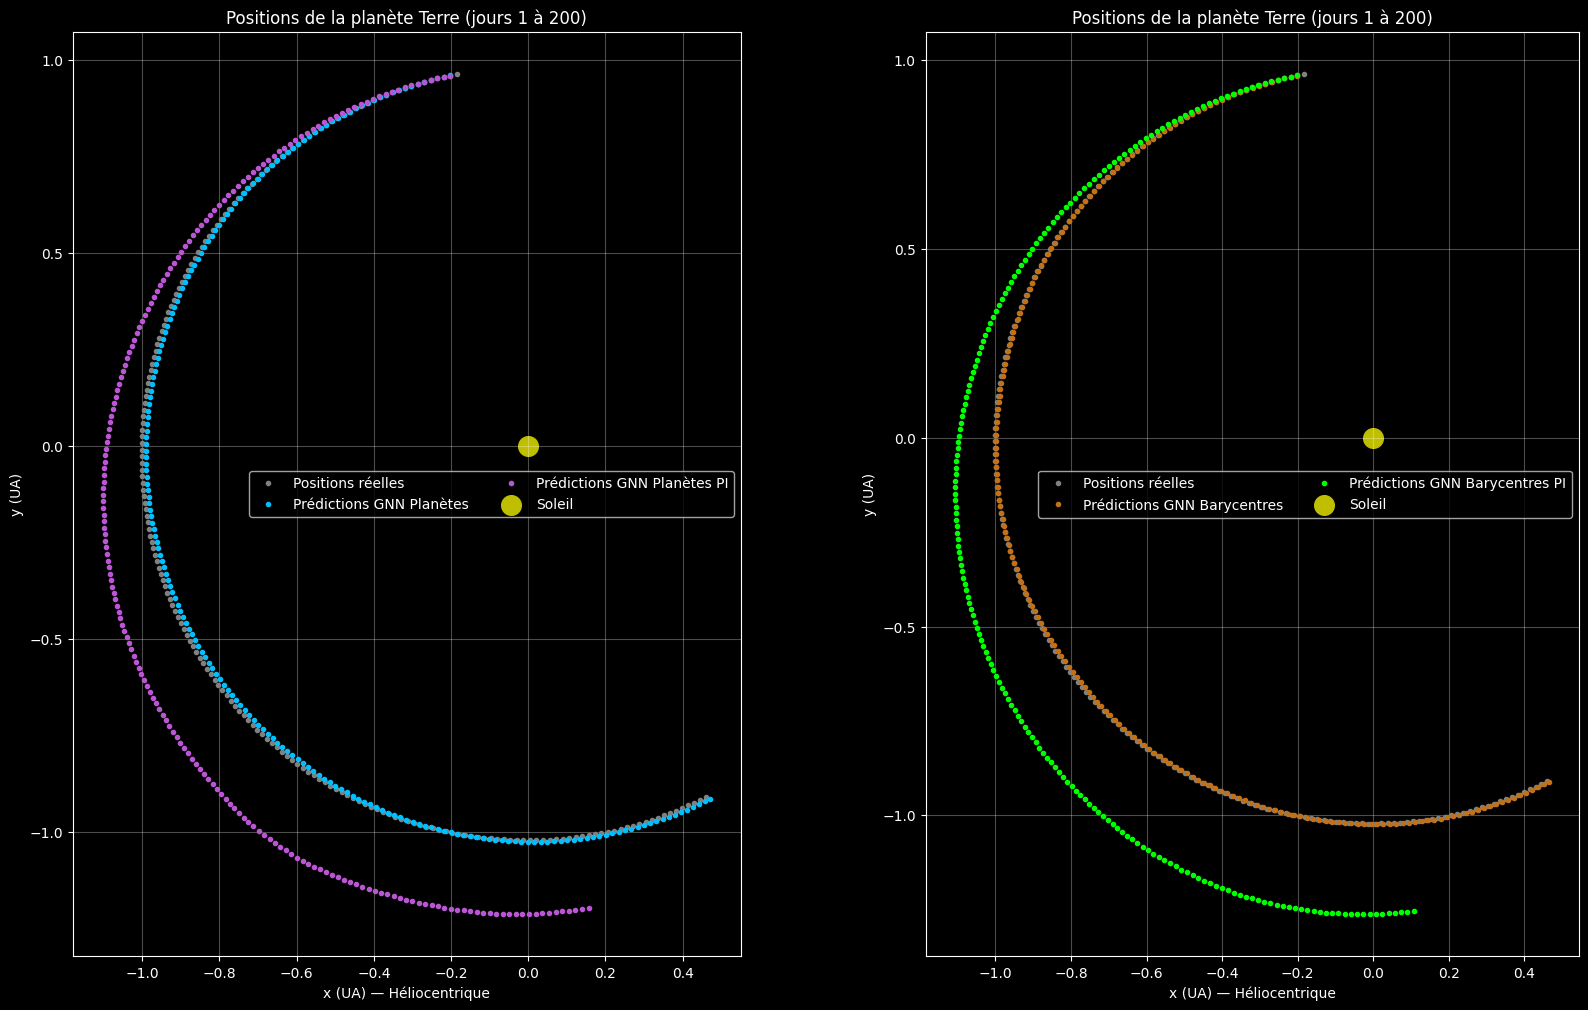

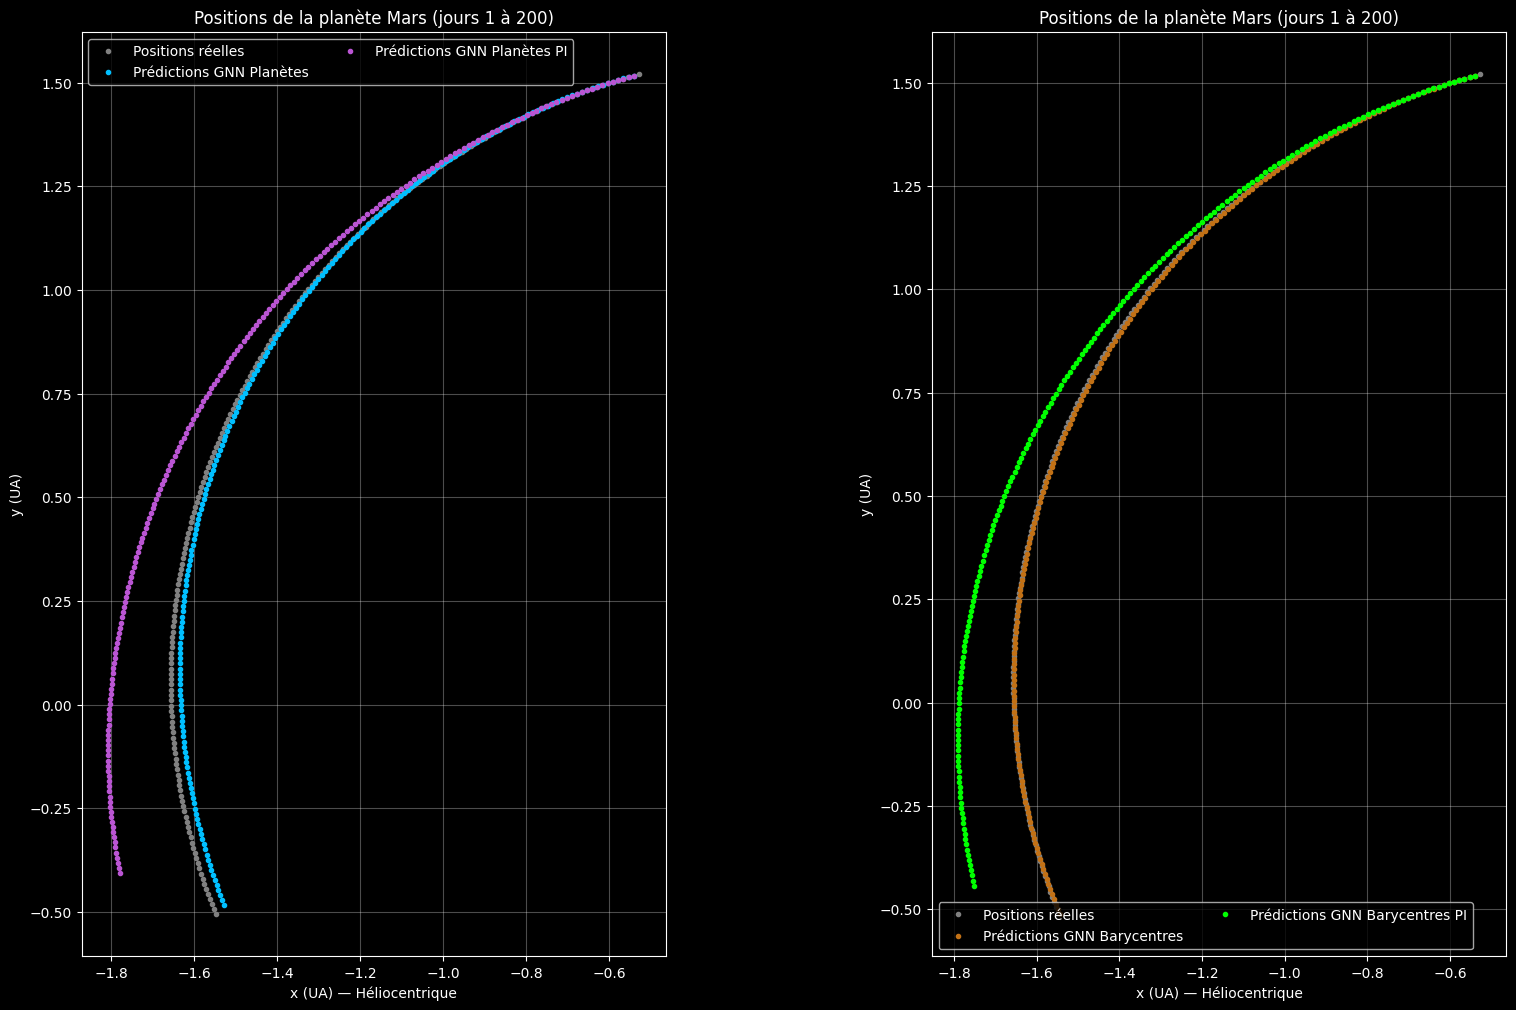

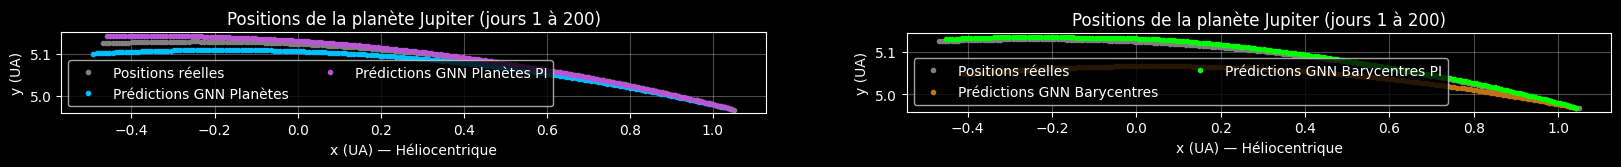

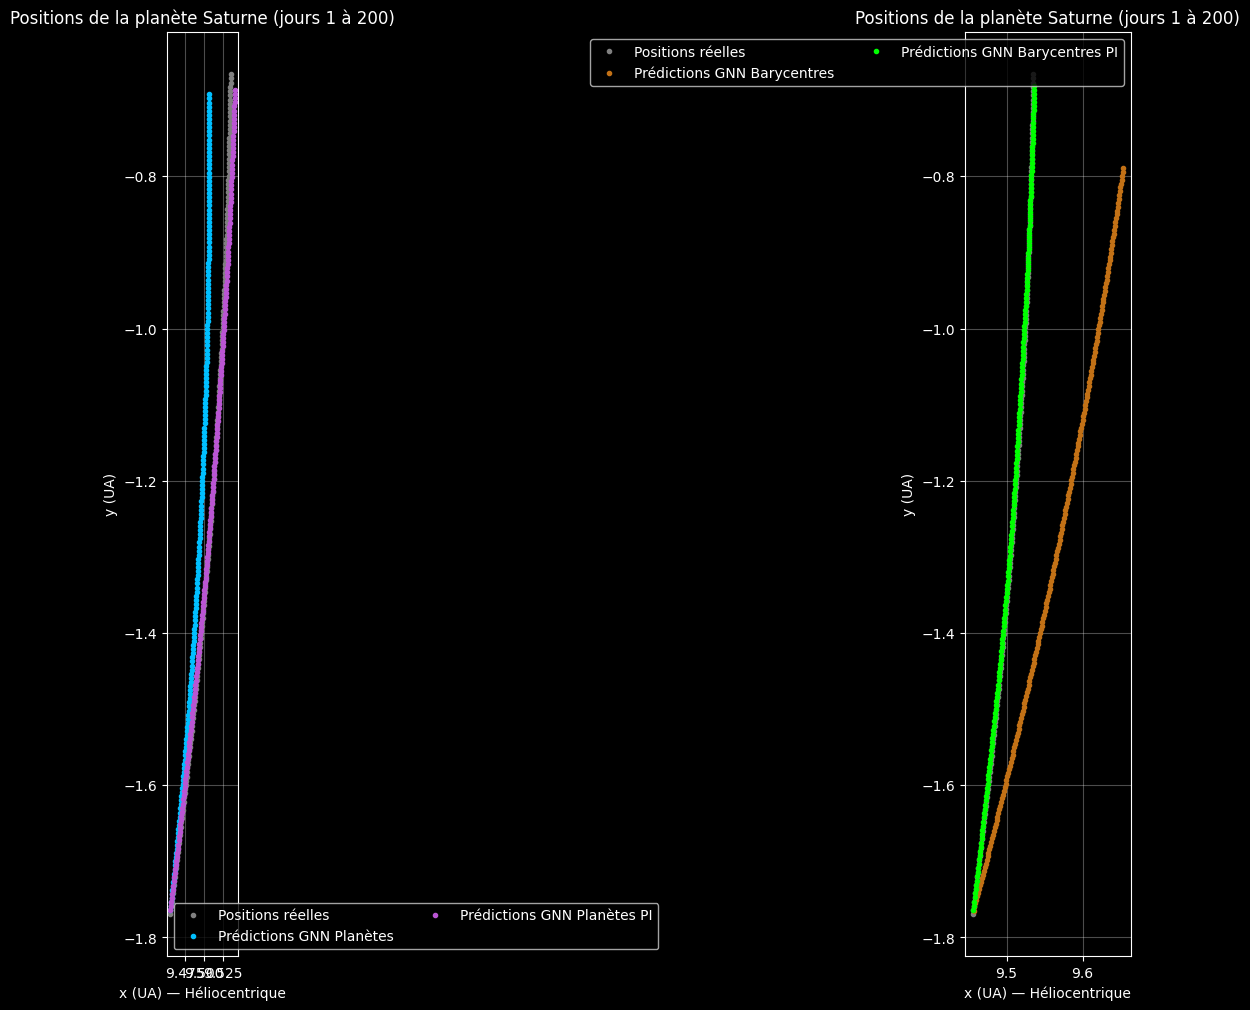

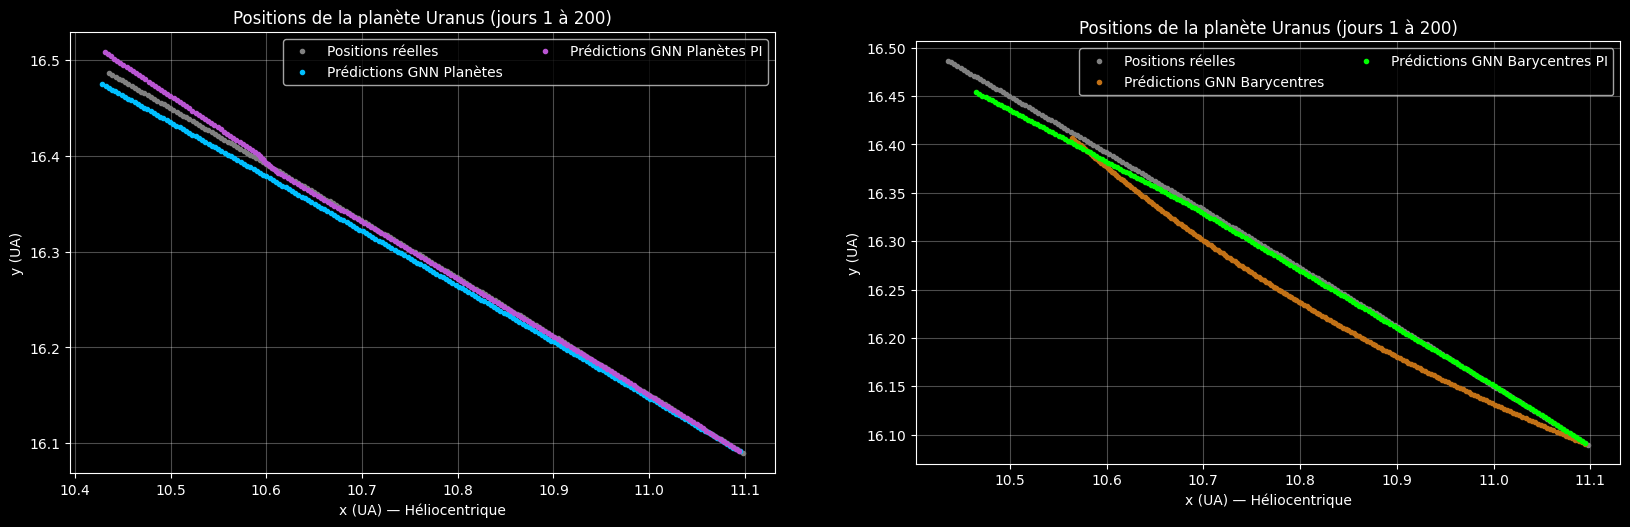

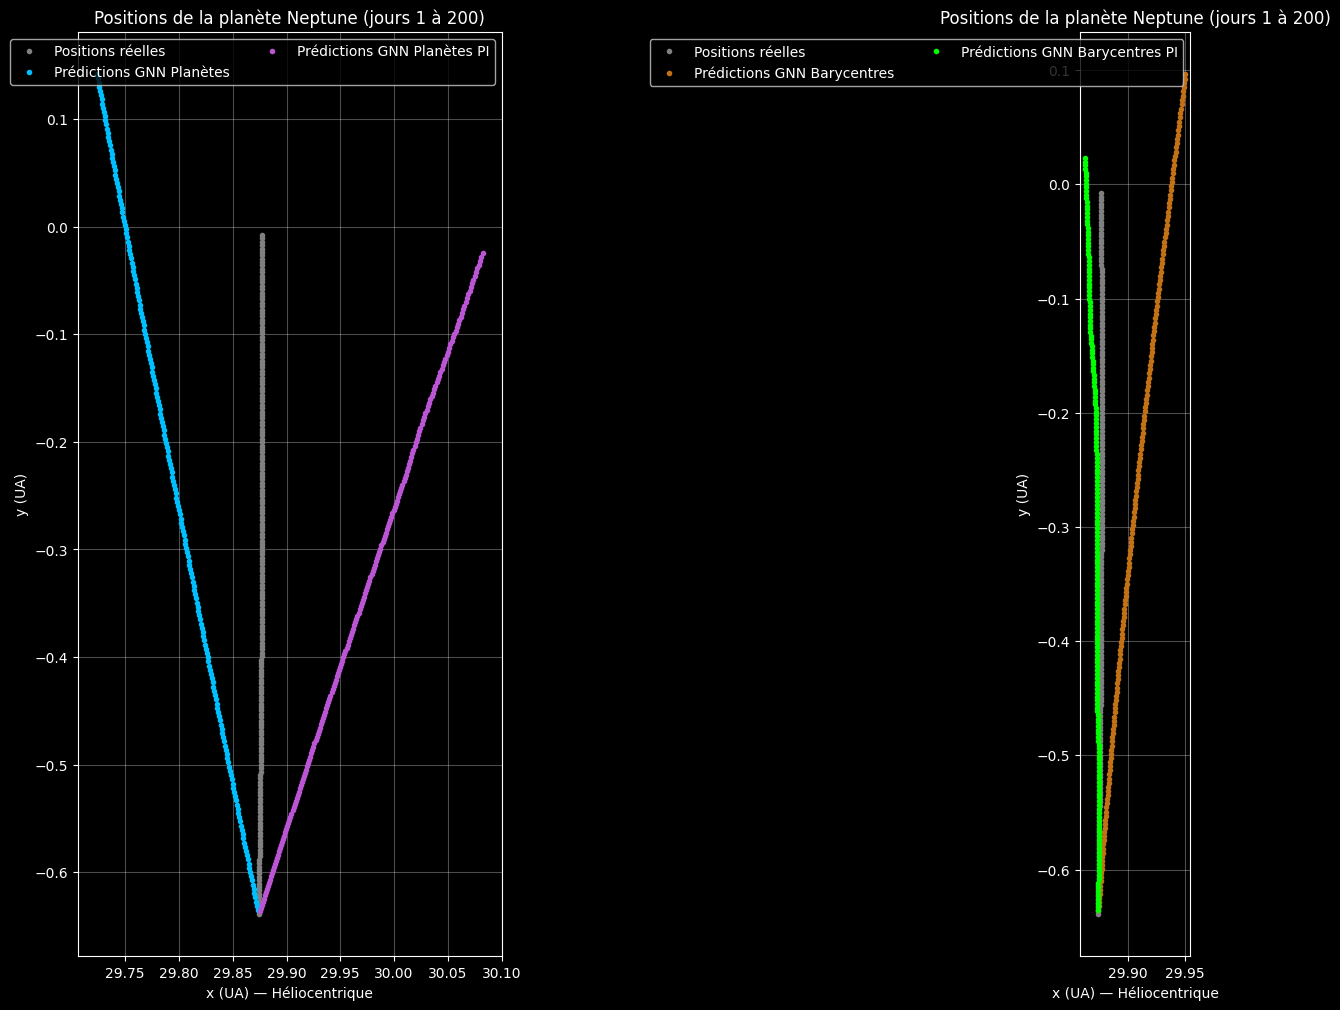

In [73]:
plot_planet_coordinates(num_days=200)

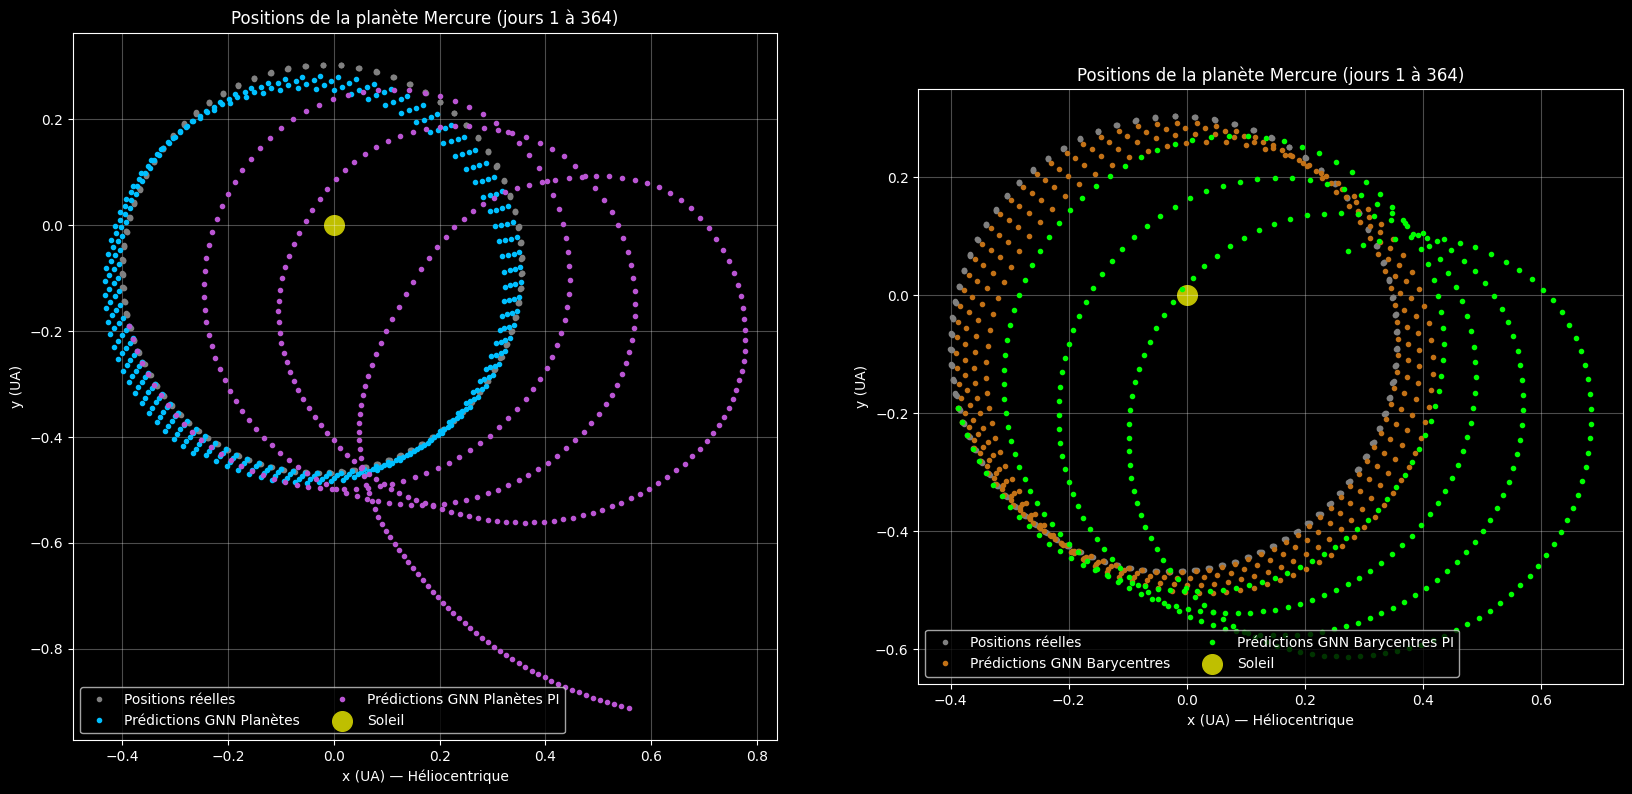

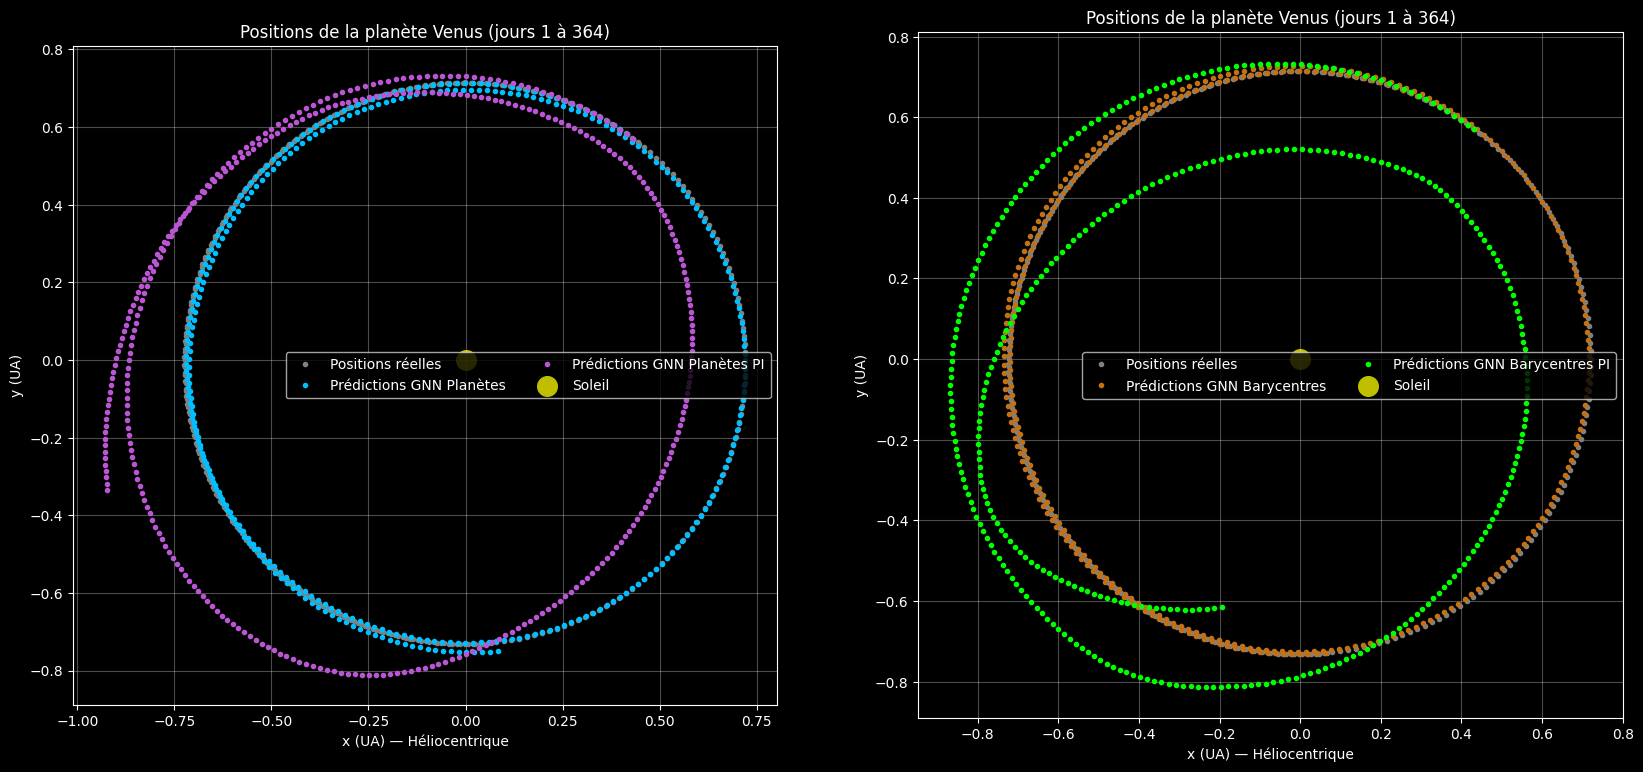

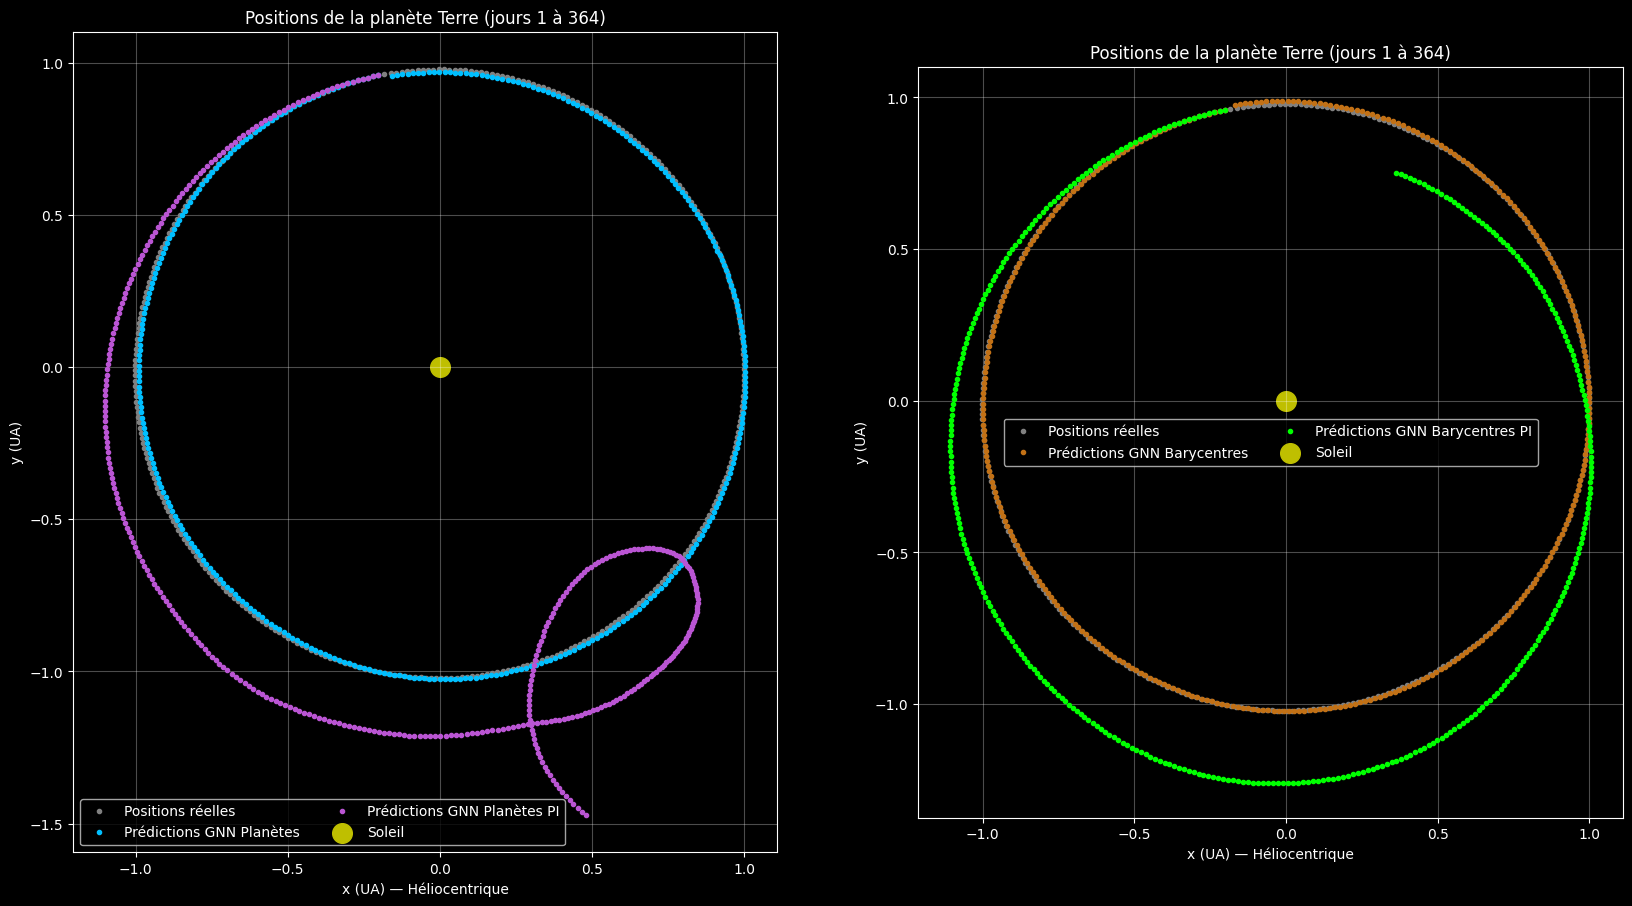

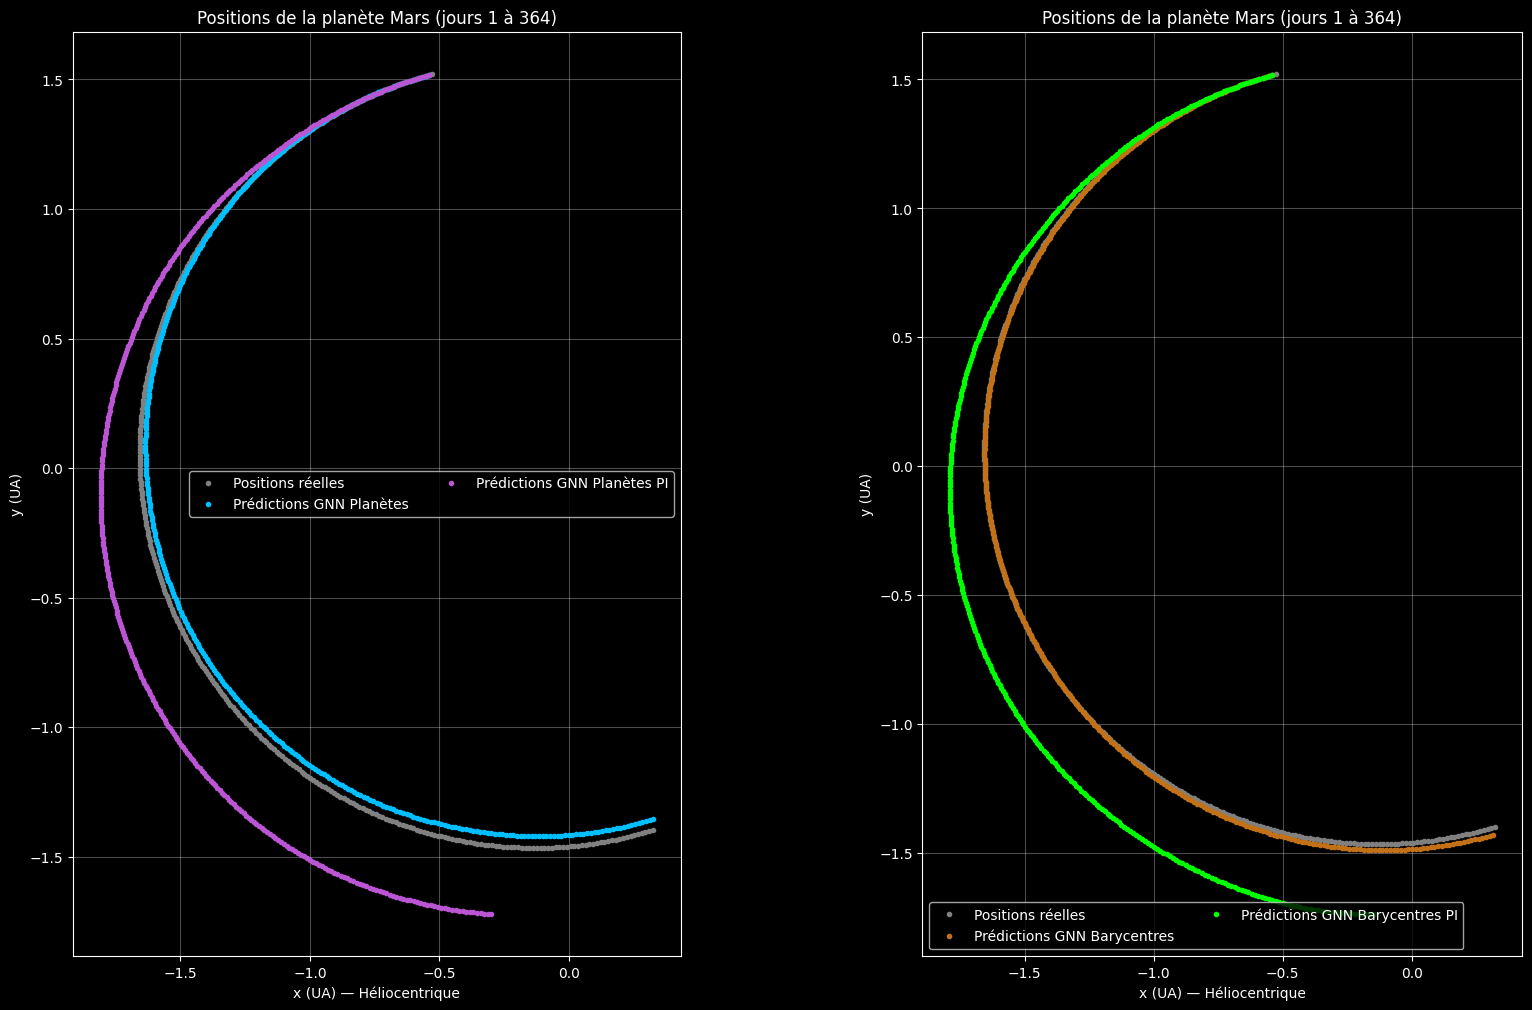

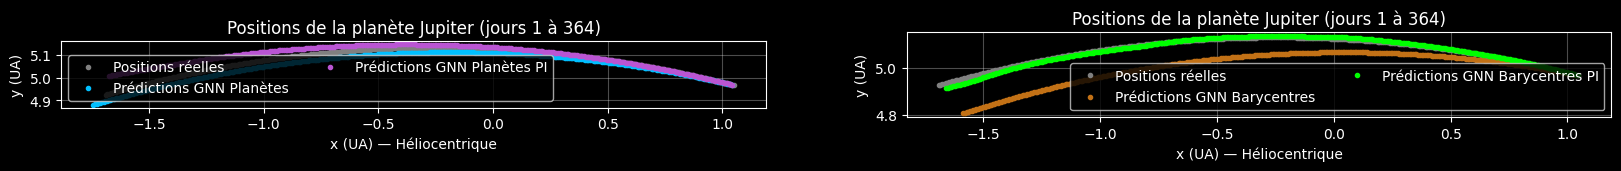

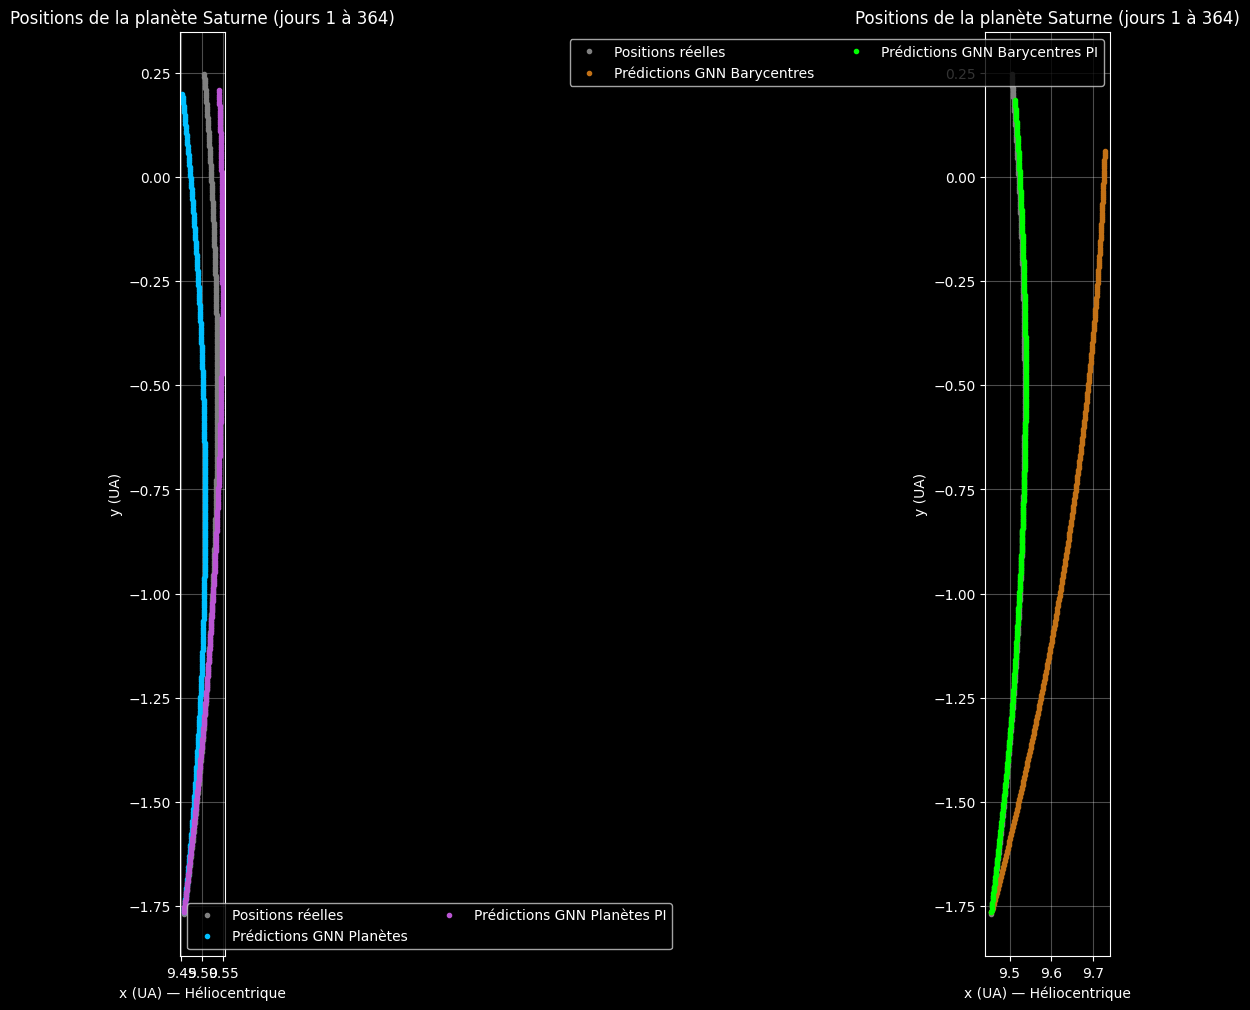

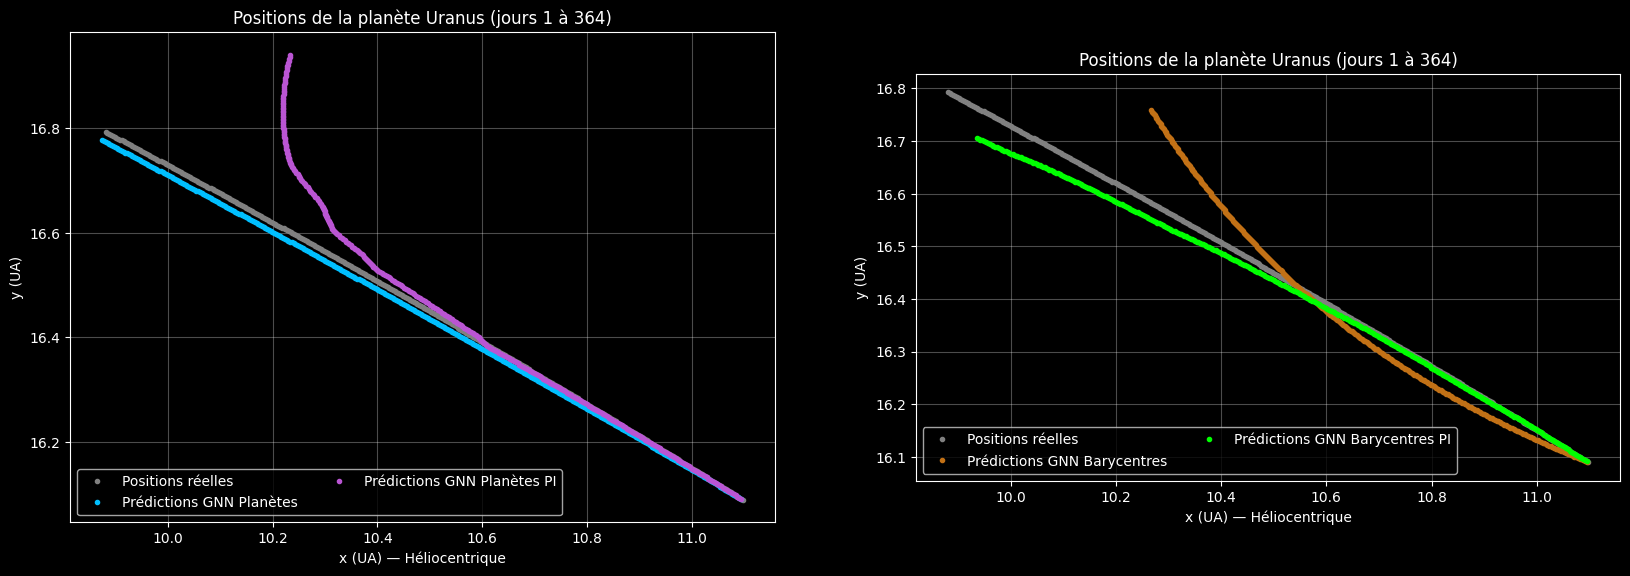

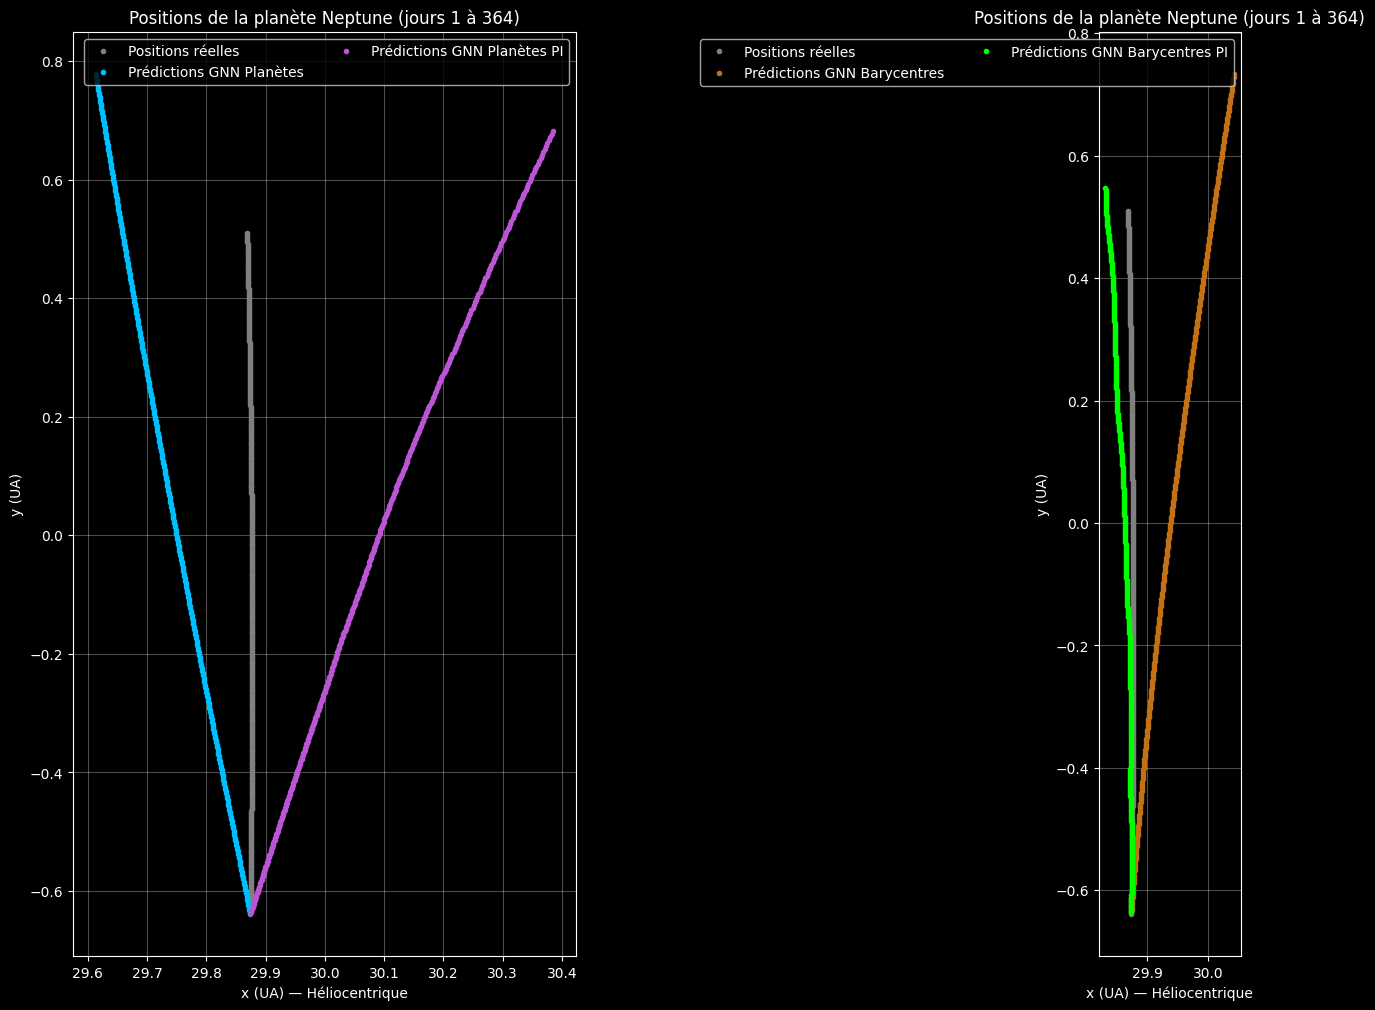

In [74]:
plot_planet_coordinates(num_days=364)